#### packages


In [1]:
#empty

In [2]:
!pip install pyforest

  Created wheel for pyforest: filename=pyforest-1.1.0-py2.py3-none-any.whl size=14607 sha256=a60c6e88ad47fe850fcce04c7aba1fd31c21b80c1a89b9f0246aa77029a2a2ab
  Stored in directory: /root/.cache/pip/wheels/61/1c/da/48e6c884142d485475d852d69d20a096aba5beceb338822893
Successfully built pyforest


In [3]:
#automatic imports required packages as per usage in code
import pyforest

In [4]:
#packages
!pip install tensorflow-probability
!pip install nbconvert

In [5]:
import pandas as pd
import numpy as np

### DATA

#### import data

In [6]:

#using official url to load data 
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00601/ai4i2020.csv'

data = pd.read_csv(url)

data.head()

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    0    0    0    0

#### data description 
taken from UCI:

Abstract: The AI4I 2020 Predictive Maintenance Dataset is a synthetic dataset that reflects real predictive maintenance data encountered in industry.

| Variable | Value |
| --- | --- |
|Data Set Characteristics:|  Multivariate, Time-Series|
|Number of Instances:|10000|
|Area:| Computer|
|Attribute Characteristics:|Real|
|Number of Attributes:|14|
|Date Donated:| 2020-08-30|
|Associated Tasks:| Classification, Regression, Causal-Discovery|
|Missing Values?| N/A|
|Number of Web Hits:|33135|

** Data Set Information: **

Since real predictive maintenance datasets are generally difficult to obtain and in particular difficult to publish, we present and provide a synthetic dataset that reflects real predictive maintenance encountered in industry to the best of our knowledge.



**Attribute Information:**

The dataset consists of 10 000 data points stored as rows with 14 features in columns
UID: unique identifier ranging from 1 to 10000
product ID: consisting of a letter L, M, or H for low (50% of all products), medium (30%) and high (20%) as product quality variants and a variant-specific serial number
air temperature [K]: generated using a random walk process later normalized to a standard deviation of 2 K around 300 K
process temperature [K]: generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.
rotational speed [rpm]: calculated from a power of 2860 W, overlaid with a normally distributed noise
torque [Nm]: torque values are normally distributed around 40 Nm with a Ïƒ = 10 Nm and no negative values.
tool wear [min]: The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process. and a
'machine failure' label that indicates, whether the machine has failed in this particular datapoint for any of the following failure modes are true.

The machine failure consists of five independent failure modes
tool wear failure (TWF): the tool will be replaced of fail at a randomly selected tool wear time between 200 â€“ 240 mins (120 times in our dataset). At this point in time, the tool is replaced 69 times, and fails 51 times (randomly assigned).
heat dissipation failure (HDF): heat dissipation causes a process failure, if the difference between air- and process temperature is below 8.6 K and the toolâ€™s rotational speed is below 1380 rpm. This is the case for 115 data points.
power failure (PWF): the product of torque and rotational speed (in rad/s) equals the power required for the process. If this power is below 3500 W or above 9000 W, the process fails, which is the case 95 times in our dataset.
overstrain failure (OSF): if the product of tool wear and torque exceeds 11,000 minNm for the L product variant (12,000 M, 13,000 H), the process fails due to overstrain. This is true for 98 datapoints.
random failures (RNF): each process has a chance of 0,1 % to fail regardless of its process parameters. This is the case for only 5 datapoints, less than could be expected for 10,000 datapoints in our dataset.

If at least one of the above failure modes is true, the process fails and the 'machine failure' label is set to 1. It is therefore not transparent to the machine learning method, which of the failure modes has caused the process to fail


**Relevant Papers:**

Stephan Matzka, 'Explainable Artificial Intelligence for Predictive Maintenance Applications', Third International Conference on Artificial Intelligence for Industries (AI4I 2020), 2020 (in press)

In [7]:
data.describe()

UDI  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean    5000.50000           300.004930               310.005560   
std     2886.89568             2.000259                 1.483734   
min        1.00000           295.300000               305.700000   
25%     2500.75000           298.300000               308.800000   
50%     5000.50000           300.100000               310.100000   
75%     7500.25000           301.500000               311.100000   
max    10000.00000           304.500000               313.800000   

       Rotational speed [rpm]   Torque [Nm]  Tool wear [min]  Machine failure  \
count            10000.000000  10000.000000     10000.000000     10000.000000   
mean              1538.776100     39.986910       107.951000         0.033900   
std                179.284096      9.968934        63.654147         0.180981   
min               1168.000000      3.800000         0.000000         0.000000   
25%               1423.000000     33.200000        53.000000         0.000000   
50%               1503.000000     40.100000       108.000000         0.000000   
75%               1612.000000     46.800000       162.000000         0.000000   
max               2886.000000     76.600000       253.000000         1.000000   

                TWF           HDF           PWF           OSF          RNF  
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.00000  
mean       0.004600      0.011500      0.009500      0.009800      0.00190  
std        0.067671      0.106625      0.097009      0.098514      0.04355  
min        0.000000      0.000000      0.000000      0.000000      0.00000  
25%        0.000000      0.000000      0.000000      0.000000      0.00000  
50%        0.000000      0.000000      0.000000      0.000000      0.00000  
75%        0.000000      0.000000      0.000000      0.000000      0.00000  
max        1.000000      1.000000      1.000000      1.000000      1.00000

In [8]:
#for i in data:
    #print(data[i].unique())

In [9]:
data.nunique()

UDI                        10000
Product ID                 10000
Type                           3
Air temperature [K]           93
Process temperature [K]       82
Rotational speed [rpm]       941
Torque [Nm]                  577
Tool wear [min]              246
Machine failure                2
TWF                            2
HDF                            2
PWF                            2
OSF                            2
RNF                            2
dtype: int64

In [10]:
#basic info about dataset
df = data
df.shape
df.index
df.columns
df.info()
df.count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

UDI                        10000
Product ID                 10000
Type                       10000
Air temperature [K]        10000
Process temperature [K]    10000
Rotational speed [rpm]     10000
Torque [Nm]                10000
Tool wear [min]            10000
Machine failure            10000
TWF                        10000
HDF                        10000
PWF                        10000
OSF                        10000
RNF                        10000
dtype: int64

In [11]:
df.sum()
df.cumsum()
df.min()
df.max()
df.describe()
df.mean()
df.median()

/usr/local/lib/python3.7/dist-packages/pyforest/__init__.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  install_nbextension,
/usr/local/lib/python3.7/dist-packages/pyforest/__init__.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  install_labextension,


UDI                        5000.5
Air temperature [K]         300.1
Process temperature [K]     310.1
Rotational speed [rpm]     1503.0
Torque [Nm]                  40.1
Tool wear [min]             108.0
Machine failure               0.0
TWF                           0.0
HDF                           0.0
PWF                           0.0
OSF                           0.0
RNF                           0.0
dtype: float64

#### preprocessing data

In [12]:
#define X and y from df
# product id is unique for each data row and its not important
# but we have product type of 3 categories
# L, M, H are three types representing for low (50% of all products),
# medium (30%) and high (20%) as product quality variants respectively
df['Type'].unique()

array(['M', 'L', 'H'], dtype=object)

In [13]:
# converting this categorical data to numerical with class 0, 1, 2 for L,M,H respectively
# using OrdinalEncoder from sklearn for ordinal data of product quality variant 
# indicating l for low quality, m for medium quality, h for high quality
# one-hot encoding is not suitable for ordinal data
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
df['Type'] = ordinal_encoder.fit_transform(df[['Type']])
df['Type'].unique()
# this gives categories converted into integers

array([2., 1., 0.])

In [14]:
# these are original categories in data
ordinal_encoder.categories_

[array(['H', 'L', 'M'], dtype=object)]

In [15]:
# this sorts all the categories present and assigns values to them in alphabetical order
# 0 for H
# 1 for L
# 2 for M
print(ordinal_encoder.inverse_transform([[0]]))
print(ordinal_encoder.inverse_transform([[1]]))
print(ordinal_encoder.inverse_transform([[2]]))

[['H']]
[['L']]
[['M']]


In [16]:
df.describe()

UDI         Type  Air temperature [K]  Process temperature [K]  \
count  10000.00000  10000.00000         10000.000000             10000.000000   
mean    5000.50000      1.19940           300.004930               310.005560   
std     2886.89568      0.60023             2.000259                 1.483734   
min        1.00000      0.00000           295.300000               305.700000   
25%     2500.75000      1.00000           298.300000               308.800000   
50%     5000.50000      1.00000           300.100000               310.100000   
75%     7500.25000      2.00000           301.500000               311.100000   
max    10000.00000      2.00000           304.500000               313.800000   

       Rotational speed [rpm]   Torque [Nm]  Tool wear [min]  Machine failure  \
count            10000.000000  10000.000000     10000.000000     10000.000000   
mean              1538.776100     39.986910       107.951000         0.033900   
std                179.284096      9.968934        63.654147         0.180981   
min               1168.000000      3.800000         0.000000         0.000000   
25%               1423.000000     33.200000        53.000000         0.000000   
50%               1503.000000     40.100000       108.000000         0.000000   
75%               1612.000000     46.800000       162.000000         0.000000   
max               2886.000000     76.600000       253.000000         1.000000   

                TWF           HDF           PWF           OSF          RNF  
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.00000  
mean       0.004600      0.011500      0.009500      0.009800      0.00190  
std        0.067671      0.106625      0.097009      0.098514      0.04355  
min        0.000000      0.000000      0.000000      0.000000      0.00000  
25%        0.000000      0.000000      0.000000      0.000000      0.00000  
50%        0.000000      0.000000      0.000000      0.000000      0.00000  
75%        0.000000      0.000000      0.000000      0.000000      0.00000  
max        1.000000      1.000000      1.000000      1.000000      1.00000

In [17]:
df.nunique()

UDI                        10000
Product ID                 10000
Type                           3
Air temperature [K]           93
Process temperature [K]       82
Rotational speed [rpm]       941
Torque [Nm]                  577
Tool wear [min]              246
Machine failure                2
TWF                            2
HDF                            2
PWF                            2
OSF                            2
RNF                            2
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  float64
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(4), int64(9)

In [19]:
# now make the final dataset to be used in NN
# remove the product id variable
# remaining attributes are of types either int64 or float64
df.drop('Product ID', axis=1, inplace=True)
df.drop('UDI', axis=1, inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  float64
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Machine failure          10000 non-null  int64  
 7   TWF                      10000 non-null  int64  
 8   HDF                      10000 non-null  int64  
 9   PWF                      10000 non-null  int64  
 10  OSF                      10000 non-null  int64  
 11  RNF                      10000 non-null  int64  
dtypes: float64(4), int64(8)
memory usage: 937.6 KB


In [21]:
## add mitosheet data visualization

#### mitosheet visualization code


In [22]:
# exploring data

In [23]:
df.hist(bins=50, figsize=(20,15))
plt.tight_layout(pad=0.4)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
df.plot.scatter(y = 'Type',x='Air temperature [K]', figsize=(20,15))
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

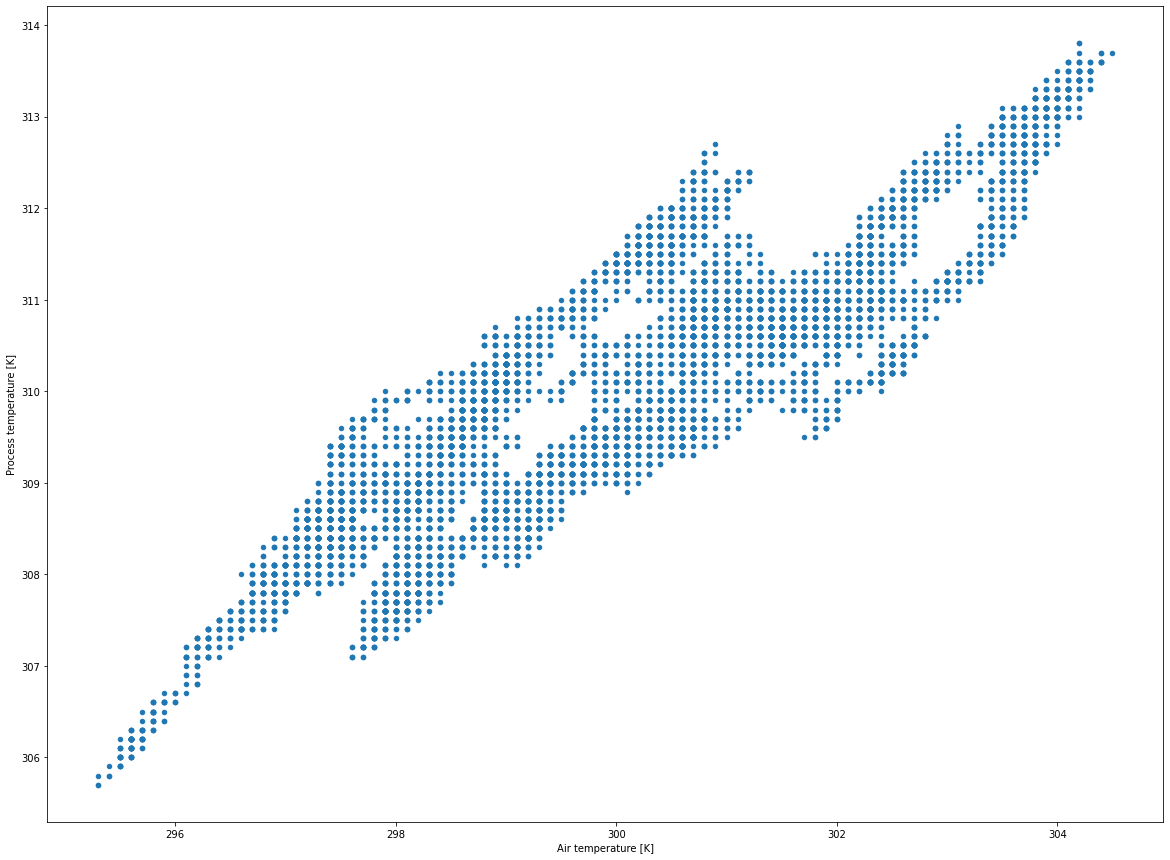

In [25]:
df.plot.scatter(y = 'Process temperature [K]',x='Air temperature [K]', figsize=(20,15))
plt.show()

<IPython.core.display.Javascript object>

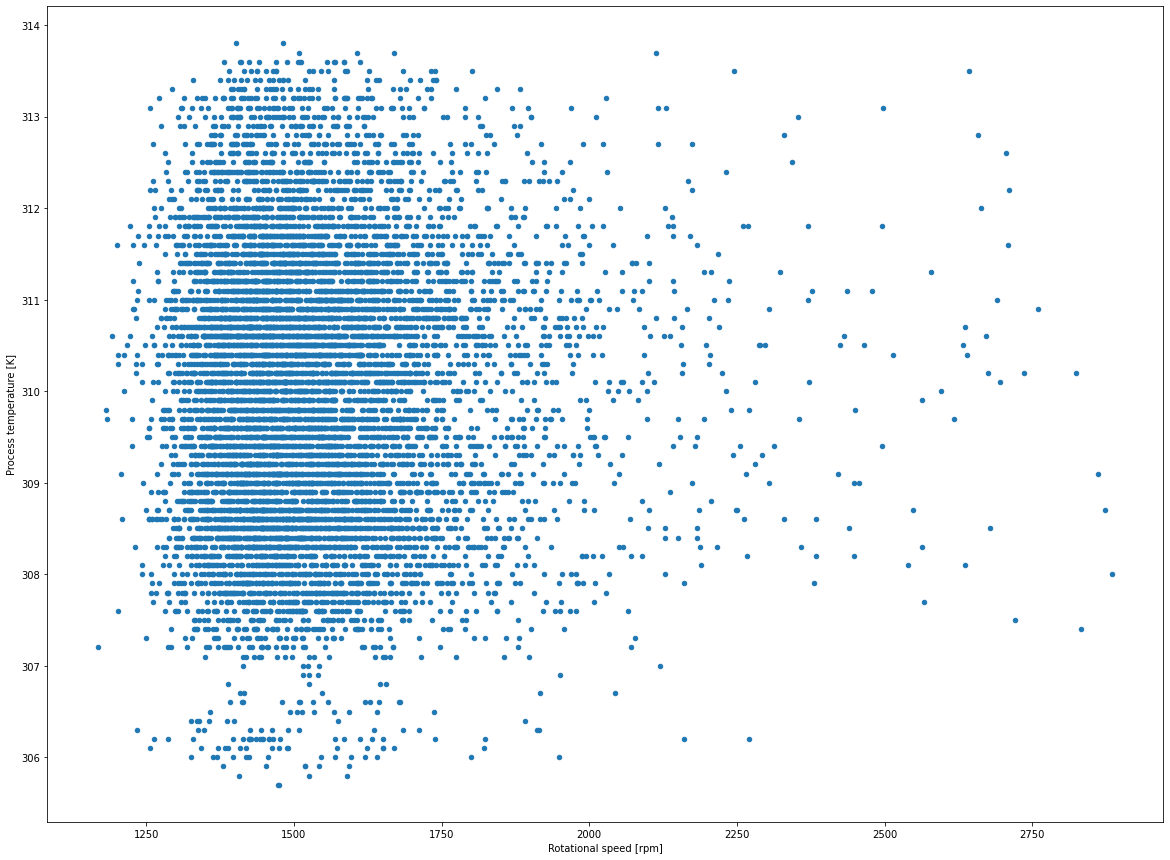

In [26]:
df.plot.scatter(y = 'Process temperature [K]',x='Rotational speed [rpm]', figsize=(20,15))
plt.show()

In [27]:
#confusion matrix

In [28]:
import seaborn as sns

#correlation matrix
numeric_col = ['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
        'TWF', 'HDF', 'PWF', 'OSF', 'RNF','Machine failure']
# Correlation Matrix formation
corr_matrix = df.loc[:,numeric_col].corr()
print(corr_matrix)
#Using heatmap to visualize the correlation matrix
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(corr_matrix, annot=True,ax=ax)


                             Type  Air temperature [K]  \
Type                     1.000000             0.017599   
Air temperature [K]      0.017599             1.000000   
Process temperature [K]  0.013444             0.876107   
Rotational speed [rpm]  -0.002693             0.022670   
Torque [Nm]              0.004011            -0.013778   
Tool wear [min]         -0.003930             0.013853   
TWF                     -0.005349             0.009955   
HDF                      0.000108             0.137831   
PWF                      0.012121             0.003470   
OSF                     -0.021211             0.001988   
RNF                     -0.022147             0.017688   
Machine failure         -0.005152             0.082556   

                         Process temperature [K]  Rotational speed [rpm]  \
Type                                    0.013444               -0.002693   
Air temperature [K]                     0.876107                0.022670   
Process temperatu

<IPython.core.display.Javascript object>

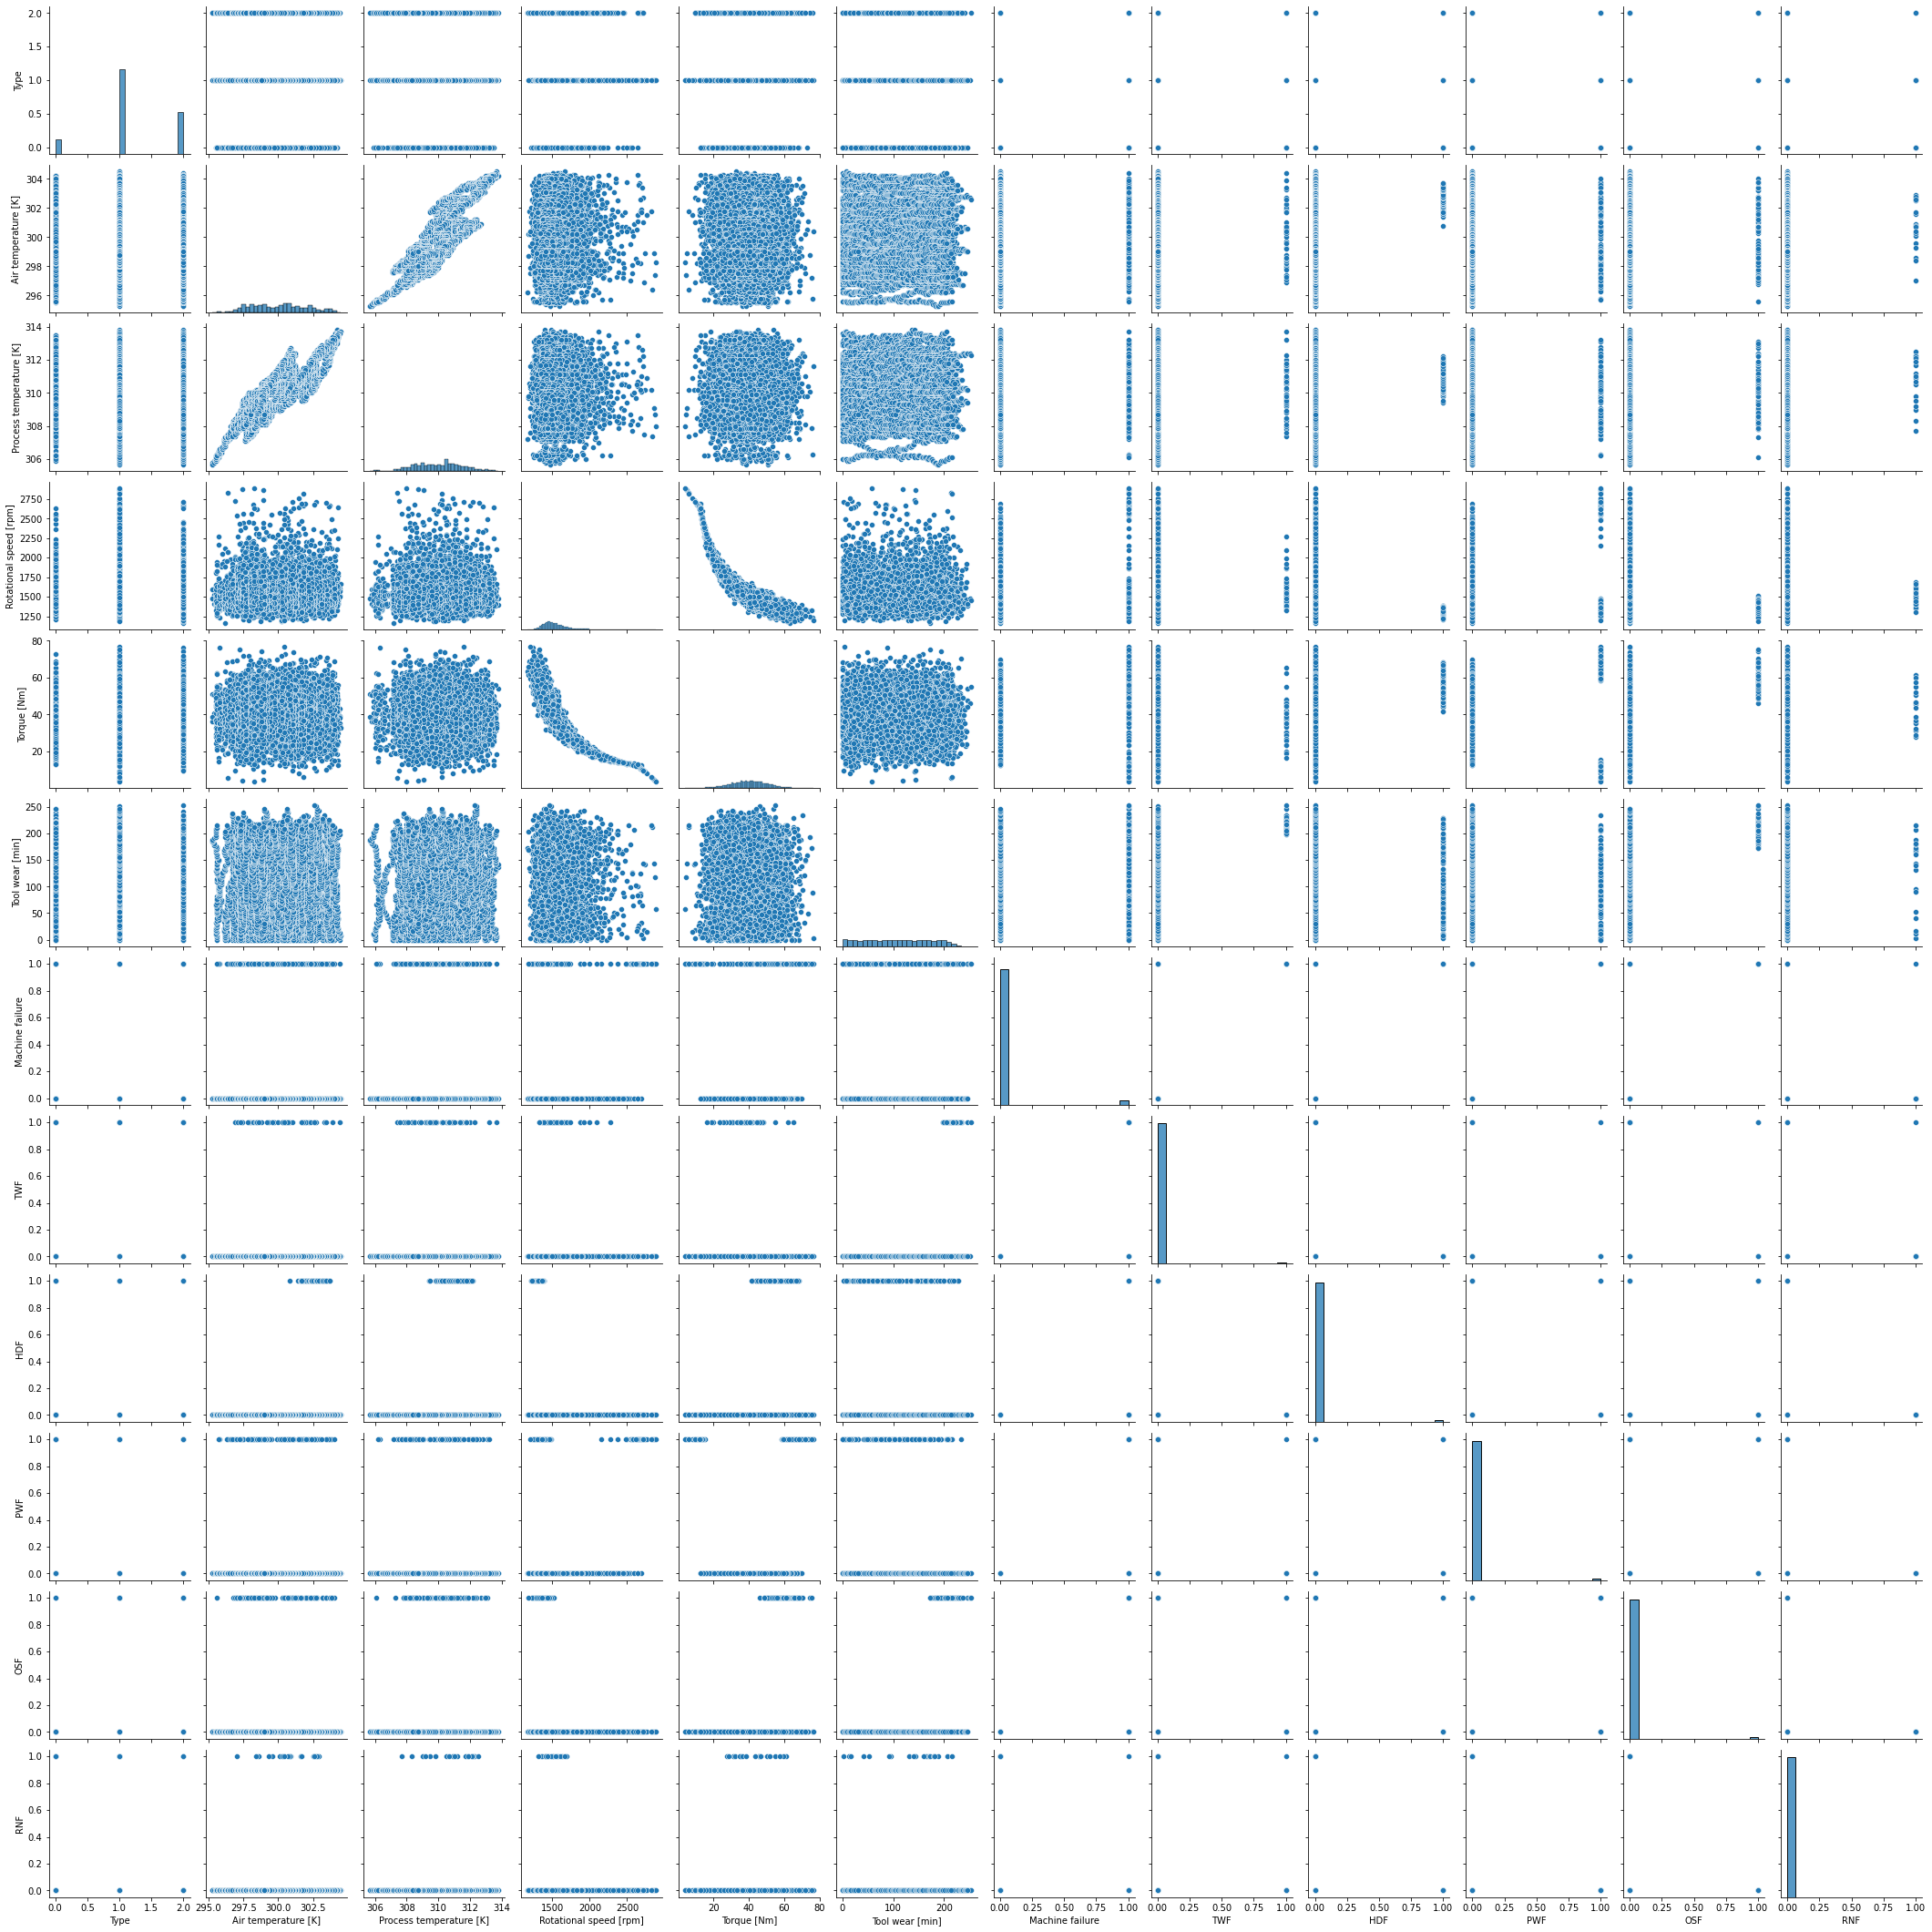

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df, kind="scatter")
plt.show()

In [30]:
plt.figure(figsize=(20,15))
plt.xticks(rotation=45)
sns.boxplot(data = df, y = 'Air temperature [K]', x = 'Machine failure');

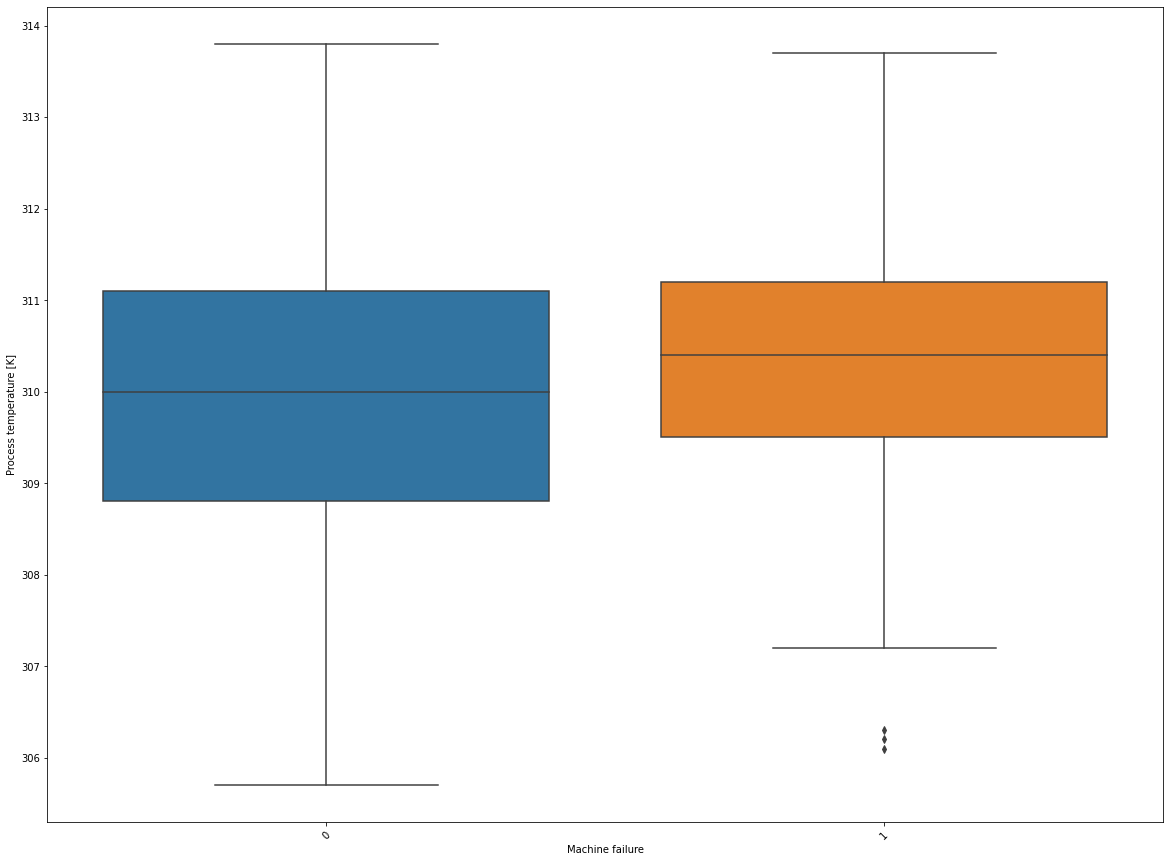

In [31]:
plt.figure(figsize=(20,15))
plt.xticks(rotation=45)
sns.boxplot(data = df, y = 'Process temperature [K]', x = 'Machine failure');

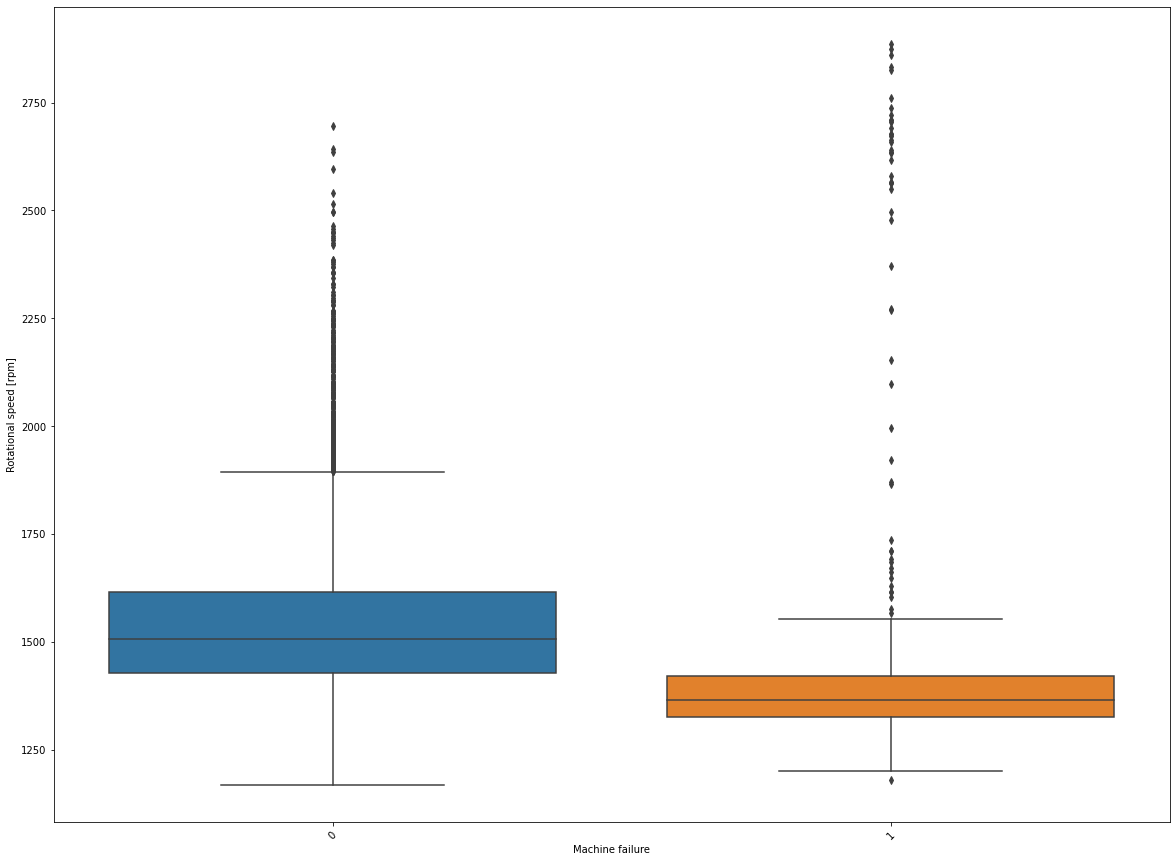

In [32]:
plt.figure(figsize=(20,15))
plt.xticks(rotation=45)
sns.boxplot(data = df, y = 'Rotational speed [rpm]', x = 'Machine failure');

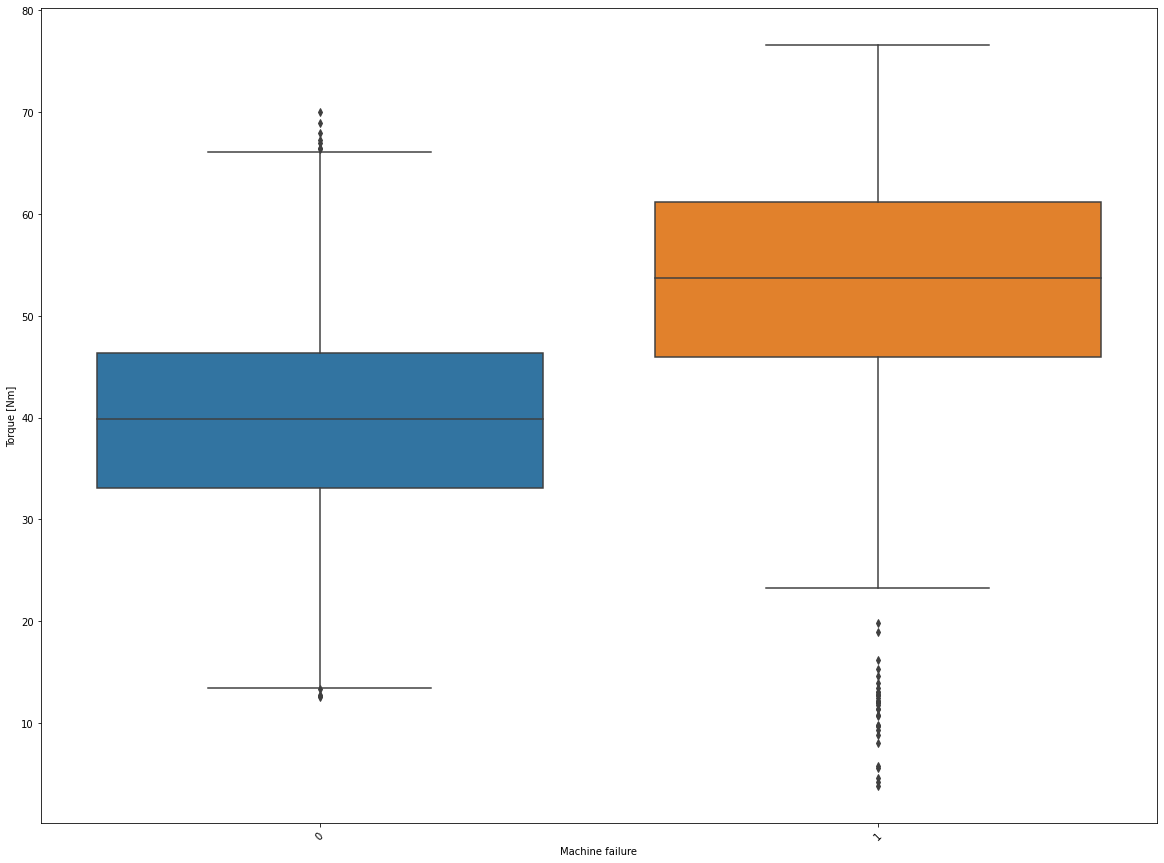

In [33]:
plt.figure(figsize=(20,15))
plt.xticks(rotation=45)
sns.boxplot(data = df, y = 'Torque [Nm]', x = 'Machine failure');

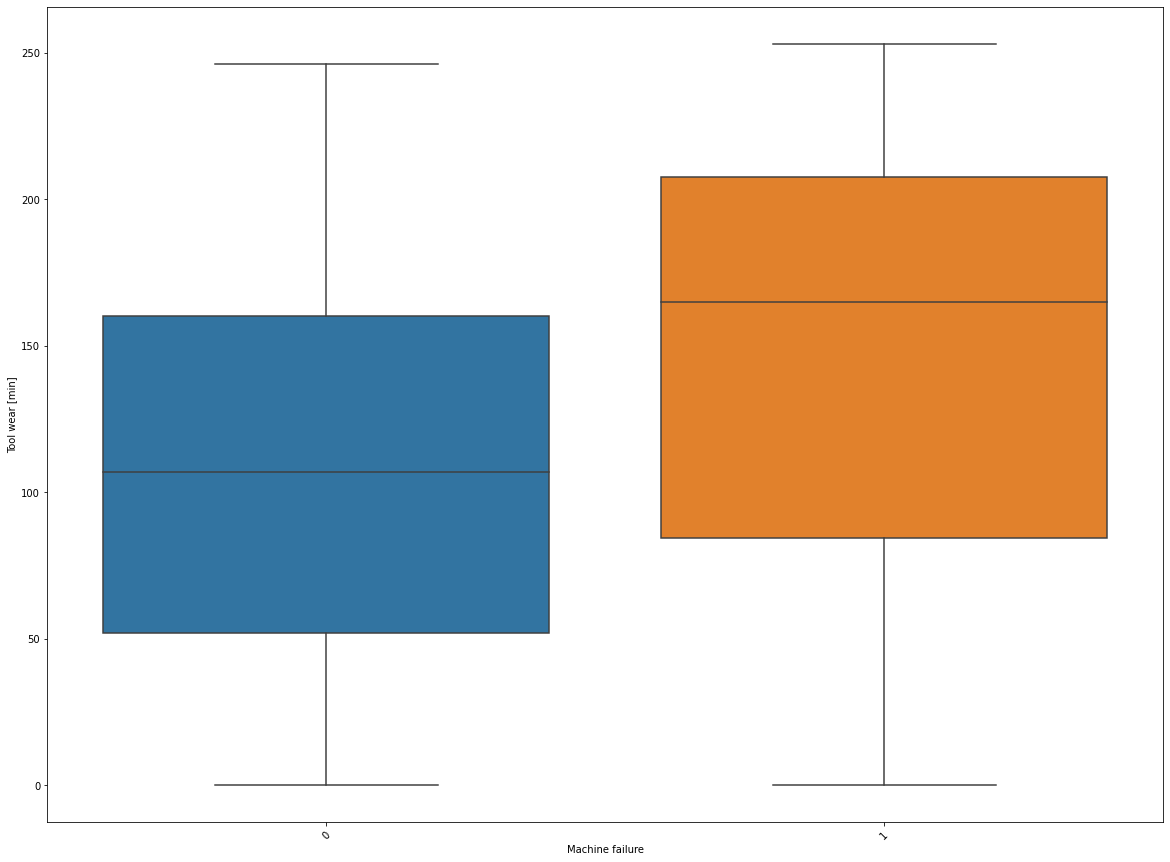

In [34]:
plt.figure(figsize=(20,15))
plt.xticks(rotation=45)
sns.boxplot(data = df, y = 'Tool wear [min]', x = 'Machine failure');

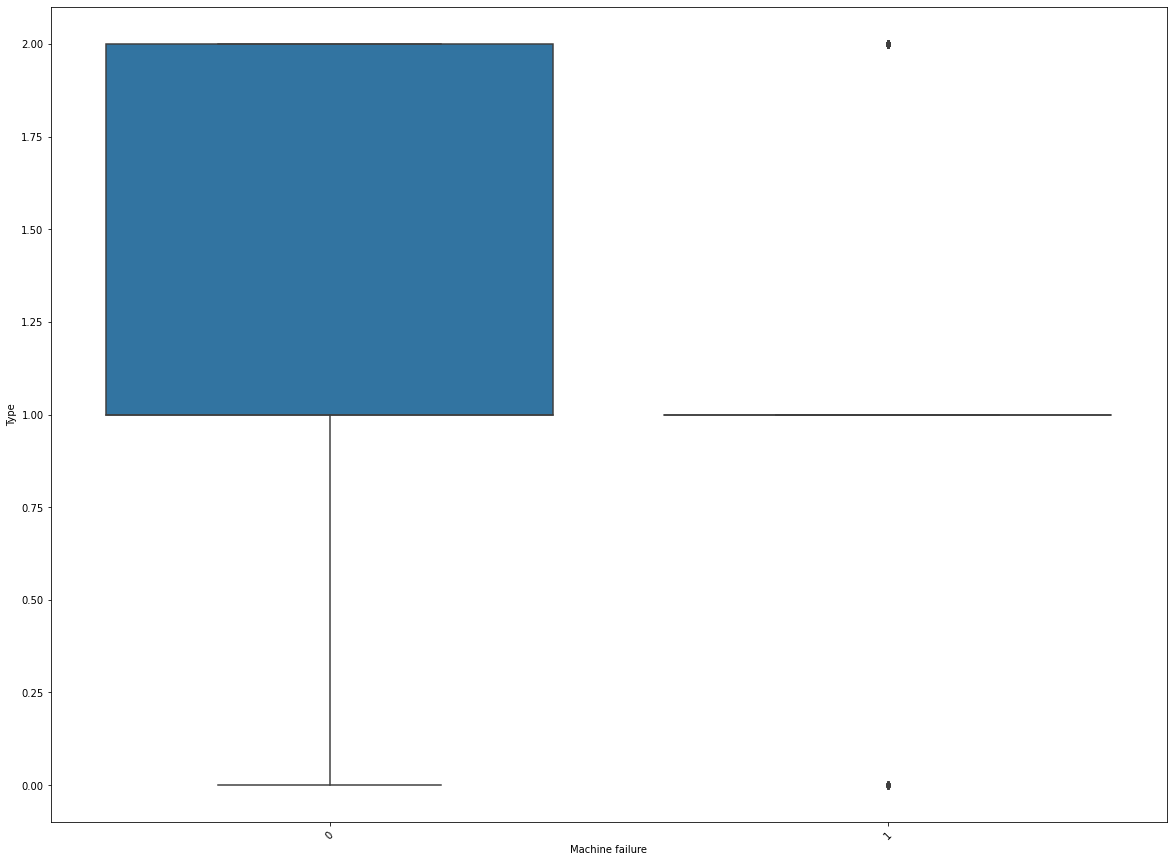

In [35]:
plt.figure(figsize=(20,15))
plt.xticks(rotation=45)
sns.boxplot(data = df, y = 'Type', x = 'Machine failure');

### BNN

In [36]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds
import tensorflow_probability as tfp

visualizing data

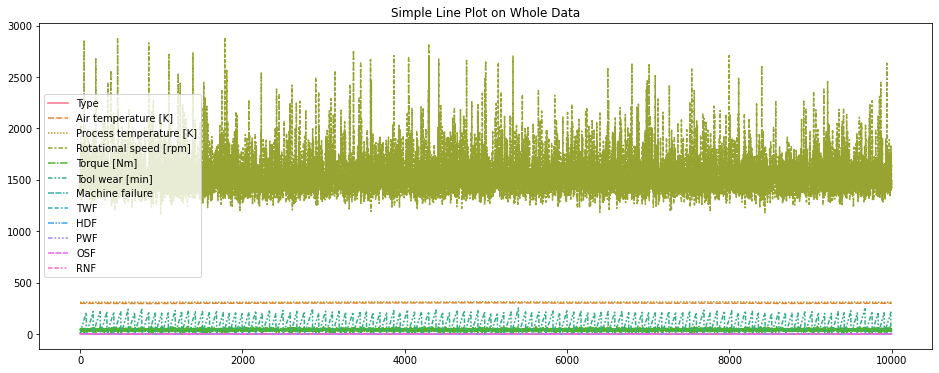

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.figure(figsize=(16,6))
plt.title("Simple Line Plot on Whole Data")
sns.lineplot(data=df)


In [38]:
#heatmaps on whole data
plt.figure(figsize=(14,7))
# Add title
plt.title("Heatmap for Predictive Maintainence")
# Heatmap
#sns.heatmap(data=df['Machine failure'], annot=True)
# Add label for horizontal axis
#plt.xlabel("Axis")

Text(0.5, 1.0, 'Heatmap for Predictive Maintainence')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 89.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


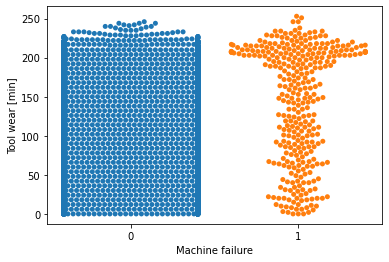

In [39]:
sns.swarmplot(x=df['Machine failure'],y=df['Tool wear [min]'])

In [40]:
#stripplot

In [41]:
#distribution
#for i in df:
sns.kdeplot(data=df['Air temperature [K]'], label='Air temperature [K]', shade=True)

plt.title('KDE Distribution')

Text(0.5, 1.0, 'KDE Distribution')

In [42]:
sns.kdeplot(data=df['Process temperature [K]'], label='Process temperature [K]', shade=True)


In [43]:
sns.kdeplot(data=df['Rotational speed [rpm]'], label='Rotational speed [rpm]', shade=True)


In [44]:
sns.kdeplot(data=df['Torque [Nm]'], label='Torque [Nm]', shade=True)


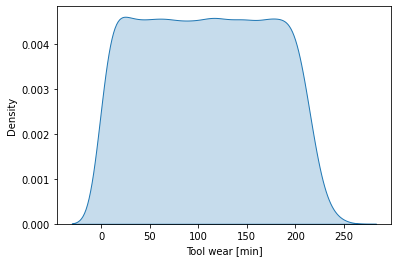

In [45]:
sns.kdeplot(data=df['Tool wear [min]'], label='Tool wear [min]', shade=True)


#### Create training and evaluation datasets


In [46]:
df.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

In [47]:
from sklearn.model_selection import train_test_split

#first moving target variable "Machine Failure" to end and then defining X and y
df = df[['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
        'TWF', 'HDF', 'PWF', 'OSF', 'RNF','Machine failure']]
print(df.shape)
# excluding last variable for target variable
X = df.iloc[:, :-1]
print(X.shape)
# making last variable as target variable 
y = df.iloc[:, -1]
print(y.shape)
# using 70:30 split for making training and testing datasets and using random state as 42 to repeat this random split.
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=0.3,random_state=42)

(10000, 12)
(10000, 11)
(10000,)


In [48]:
# the shapes of X_train,X_test,y_train,y_test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7000, 11)
(3000, 11)
(7000,)
(3000,)


In [49]:
print(X_train.shape)
print(y_train.shape)

(7000, 11)
(7000,)


In [50]:
y_train.head()

9069    0
2603    0
7738    0
1579    0
5058    0
Name: Machine failure, dtype: int64

In [51]:
# correct
#done
#train dataset
train_d = pd.DataFrame(X_train)
train_d['y_train'] = y_train
print(train_d.shape)
print(train_d.shape)

#test dataset
test_d = pd.DataFrame(X_test)
test_d['y_test'] = y_test
print(test_d.shape)
print(test_d.shape)

(7000, 12)
(7000, 12)
(3000, 12)
(3000, 12)


In [52]:
train_d.head()

Type  Air temperature [K]  Process temperature [K]  \
9069   2.0                297.2                    308.2   
2603   2.0                299.3                    309.2   
7738   2.0                300.5                    312.0   
1579   1.0                298.3                    308.3   
5058   1.0                303.9                    312.9   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  TWF  HDF  PWF  \
9069                    1678         28.1              133    0    0    0   
2603                    1334         46.3               31    0    0    0   
7738                    1263         60.8              146    0    0    0   
1579                    1444         43.8              176    0    0    0   
5058                    1526         42.5              194    0    0    0   

      OSF  RNF  y_train  
9069    0    0        0  
2603    0    0        0  
7738    0    0        0  
1579    0    0        0  
5058    0    0        0

In [53]:
test_d.head()

Type  Air temperature [K]  Process temperature [K]  \
6252   1.0                300.8                    310.3   
4684   2.0                303.6                    311.8   
1731   2.0                298.3                    307.9   
4742   1.0                303.3                    311.3   
4521   1.0                302.4                    310.4   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  TWF  HDF  PWF  \
6252                    1538         36.1              198    0    0    0   
4684                    1421         44.8              101    0    0    0   
1731                    1485         42.0              117    0    0    0   
4742                    1592         33.7               14    0    0    0   
4521                    1865         23.9              129    0    0    0   

      OSF  RNF  y_test  
6252    0    0       0  
4684    0    0       1  
1731    0    0       0  
4742    0    0       0  
4521    0    0       0

#### Compile, train, and evaluate the model


In [54]:
# from here will write in the form of functions


#### Create model inputs


#### Experiment 1: standard neural network(Non-bayesian neural network)


In [55]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # to initialize NN
from keras.layers import Dense # to build layers

classifier = Sequential()
classifier.add(Dense(units = 5, input_dim = X_train.shape[1])) # changed this
classifier.add(Dense(units = 3, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = classifier.fit(X_train, y_train, epochs=50)
#validation_data = (np.asarray(X_test), np.asarray(y_test)),verbose=0
test_loss, test_acc = classifier.evaluate(X_test,  y_test, verbose=2)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)



Epoch 1/50
219/219 [==============================] - 1s 2ms/step - loss: 0.3808 - accuracy: 0.9453
Epoch 2/50
219/219 [==============================] - 1s 3ms/step - loss: 0.1759 - accuracy: 0.9649
Epoch 3/50
219/219 [==============================] - 0s 2ms/step - loss: 0.1574 - accuracy: 0.9649
Epoch 4/50
219/219 [==============================] - 1s 3ms/step - loss: 0.1505 - accuracy: 0.9649
Epoch 5/50
219/219 [==============================] - 0s 2ms/step - loss: 0.1466 - accuracy: 0.9649
Epoch 6/50
219/219 [==============================] - 0s 2ms/step - loss: 0.1451 - accuracy: 0.9649
Epoch 7/50
219/219 [==============================] - 0s 2ms/step - loss: 0.1449 - accuracy: 0.9649
Epoch 8/50
219/219 [==============================] - 0s 2ms/step - loss: 0.1416 - accuracy: 0.9649
Epoch 9/50
219/219 [==============================] - 0s 2ms/step - loss: 0.1406 - accuracy: 0.9649
Epoch 10/50
219/219 [==============================] - 0s 2ms/step - loss: 0.1373 - accuracy: 0.9649


train accuracy: 0.9649, loss: 0.1522 after 50 epochs
test accuracy: 0.9690, loss: 0.1385

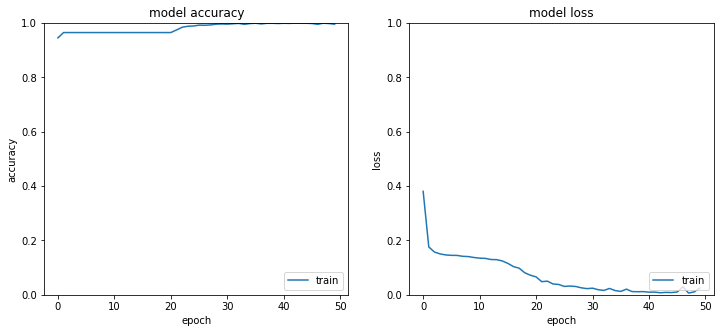

In [56]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.ylim(0, 1)
# summarize history for loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.ylim(0, 1)
plt.show()

In [57]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 65        
                                                                 
 dense_1 (Dense)             (None, 3)                 18        
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 87
Trainable params: 87
Non-trainable params: 0
_________________________________________________________________


In [58]:
# checking the probabilities
probability_model = Sequential([classifier, tf.keras.layers.Softmax()])
predictions = probability_model.predict(X_test)
predictions[0]

array([1.], dtype=float32)

In [59]:
np.argmax(predictions[0])

0

In [60]:
y_test[0]

0

In [61]:
predictions

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [62]:
y_test.nunique

<bound method IndexOpsMixin.nunique of 6252    0
4684    1
1731    0
4742    0
4521    0
       ..
8014    0
1074    0
3063    0
6487    0
4705    0
Name: Machine failure, Length: 3000, dtype: int64>

#### Experiment 2: Bayesian neural network (BNN)


##### dependencies and prerequisites

In [63]:
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import tensorflow.compat.v2 as tf
tf.enable_v2_behavior()

import tensorflow_probability as tfp

sns.reset_defaults()
sns.set_context(context='talk',font_scale=0.7)
plt.rcParams['image.cmap'] = 'viridis'

%matplotlib inline

tfd = tfp.distributions
tfb = tfp.bijectors

##### define priors and other functions


In [64]:
# to build the bnn

##### define bnn functions and class

In [65]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # to initialize NN
from keras.layers import Dense # to build layers
'''
classifier = Sequential()
classifier.add(Dense(units = 8, input_dim = X_train.shape[1])) # changed this
classifier.add(Dense(units = 4, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(X_train, y_train, epochs=100)
test_loss, test_acc = classifier.evaluate(X_test,  y_test, verbose=2)
print('\nTest accuracy:', test_acc)

'''

"\nclassifier = Sequential()\nclassifier.add(Dense(units = 8, input_dim = X_train.shape[1])) # changed this\nclassifier.add(Dense(units = 4, activation = 'relu'))\nclassifier.add(Dense(units = 1, activation = 'sigmoid'))\nclassifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])\nclassifier.fit(X_train, y_train, epochs=100)\ntest_loss, test_acc = classifier.evaluate(X_test,  y_test, verbose=2)\nprint('\nTest accuracy:', test_acc)\n\n"

target is machine failure variable

In [66]:
from sklearn.model_selection import train_test_split

#first moving target variable "Machine Failure" to end and then defining X and y
df = df[['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
        'TWF', 'HDF', 'PWF', 'OSF', 'RNF','Machine failure']]
print(df.shape)
# excluding last variable for target variable
X = df.iloc[:, :-1]
print(X.shape)
# making last variable as target variable 
y = df.iloc[:, -1]
print(y.shape)
# using 70:30 split for making training and testing datasets and using random state as 42 to repeat this random split.
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=0.3,random_state=42)

(10000, 12)
(10000, 11)
(10000,)


In [67]:
dist = tfp.distributions 
dataset_size = len(X_train)
kl_divergence_function = (lambda q, p, _: dist.kl_divergence(q, p) / tf.cast(dataset_size, dtype=tf.float32))

model_tfp = tf.keras.Sequential([
    tf.keras.Input(X_train.shape[1]),
    tfp.layers.DenseFlipout(16, kernel_divergence_fn=kl_divergence_function),#, activation=tf.nn.relu),
    tfp.layers.DenseFlipout(6, kernel_divergence_fn=kl_divergence_function, activation=tf.nn.relu ),
    tfp.layers.DenseFlipout(3, kernel_divergence_fn=kl_divergence_function, activation=tf.nn.softmax),
])

learning_rate = 0.001
model_tfp.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),loss='binary_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow_probability/python/layers/util.py:102: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  trainable=trainable)
/usr/local/lib/python3.7/dist-packages/tensorflow_probability/python/layers/util.py:112: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  trainable=trainable)


In [68]:
model_tfp.fit(X_train, y_train, epochs=50)
test_loss, test_acc = model_tfp.evaluate(X_test,  y_test)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

Epoch 1/50
219/219 [==============================] - 3s 3ms/step - loss: 0.8826 - accuracy: 0.1604
Epoch 2/50
219/219 [==============================] - 1s 3ms/step - loss: 0.5352 - accuracy: 0.0457
Epoch 3/50
219/219 [==============================] - 1s 3ms/step - loss: 0.5301 - accuracy: 0.0416
Epoch 4/50
219/219 [==============================] - 1s 3ms/step - loss: 0.5253 - accuracy: 0.0384
Epoch 5/50
219/219 [==============================] - 1s 3ms/step - loss: 0.5218 - accuracy: 0.0227
Epoch 6/50
219/219 [==============================] - 1s 3ms/step - loss: 0.5186 - accuracy: 0.3166
Epoch 7/50
219/219 [==============================] - 1s 3ms/step - loss: 0.5154 - accuracy: 0.0011
Epoch 8/50
219/219 [==============================] - 1s 3ms/step - loss: 0.5125 - accuracy: 0.0137
Epoch 9/50
219/219 [==============================] - 1s 3ms/step - loss: 0.5093 - accuracy: 0.0356
Epoch 10/50
219/219 [==============================] - 1s 3ms/step - loss: 0.5066 - accuracy: 0.1624

Test accuracy: 0.968666672706604 after 50 epochs and test loss: 0.450

In [69]:
history = model_tfp.fit(np.asarray(X_train), np.asarray(y_train),epochs=50, validation_split=0.3,  shuffle=True)

Epoch 1/50
154/154 [==============================] - 2s 8ms/step - loss: 0.4614 - accuracy: 0.0253 - val_loss: 0.4622 - val_accuracy: 4.7619e-04
Epoch 2/50
154/154 [==============================] - 1s 6ms/step - loss: 0.4616 - accuracy: 0.3765 - val_loss: 0.4616 - val_accuracy: 0.9633
Epoch 3/50
154/154 [==============================] - 1s 5ms/step - loss: 0.4608 - accuracy: 0.3951 - val_loss: 0.4634 - val_accuracy: 0.9629
Epoch 4/50
154/154 [==============================] - 1s 5ms/step - loss: 0.4599 - accuracy: 0.9473 - val_loss: 0.4609 - val_accuracy: 0.9633
Epoch 5/50
154/154 [==============================] - 1s 5ms/step - loss: 0.4602 - accuracy: 0.4706 - val_loss: 0.4606 - val_accuracy: 0.0000e+00
Epoch 6/50
154/154 [==============================] - 1s 6ms/step - loss: 0.4599 - accuracy: 0.6651 - val_loss: 0.4602 - val_accuracy: 0.9633
Epoch 7/50
154/154 [==============================] - 1s 6ms/step - loss: 0.4586 - accuracy: 0.9329 - val_loss: 0.4599 - val_accuracy: 0.000

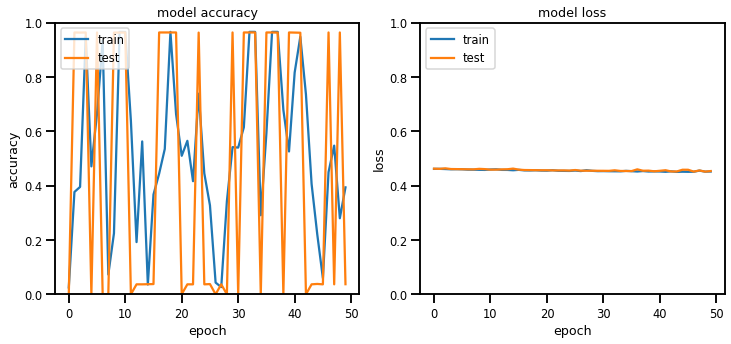

In [70]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim(0, 1)
# summarize history for loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim(0, 1)
plt.show()

In [71]:
model_tfp.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_flipout (DenseFlipout  (None, 16)               368       
 )                                                               
                                                                 
 dense_flipout_1 (DenseFlipo  (None, 6)                198       
 ut)                                                             
                                                                 
 dense_flipout_2 (DenseFlipo  (None, 3)                39        
 ut)                                                             
                                                                 
Total params: 605
Trainable params: 605
Non-trainable params: 0
_________________________________________________________________


define tensorboard variables for we plots

##### Train BNN with a small training subset.


##### Train BNN with the whole training set.


#####EXP VBNN:


In [72]:
dist = tfp.distributions 
dataset_size = len(X_train)
kl_divergence_function = (lambda q, p, _: dist.kl_divergence(q, p) / tf.cast(dataset_size, dtype=tf.float32))

model_tfp_v1 = tf.keras.Sequential([
    tf.keras.Input(X_train.shape[1]),
    tfp.layers.DenseFlipout(14, kernel_divergence_fn=kl_divergence_function, activation=tf.nn.relu),
    tfp.layers.DenseFlipout(6, kernel_divergence_fn=kl_divergence_function, activation=tf.nn.relu ),
    tfp.layers.DenseFlipout(2, kernel_divergence_fn=kl_divergence_function, activation=tf.nn.softmax),
])

learning_rate = 0.002
model_tfp_v1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),loss='binary_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow_probability/python/layers/util.py:102: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  trainable=trainable)
/usr/local/lib/python3.7/dist-packages/tensorflow_probability/python/layers/util.py:112: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  trainable=trainable)


In [74]:
from keras.utils.vis_utils import plot_model

In [75]:
history = model_tfp_v1.fit(X_train, y_train, epochs=40)
test_loss, test_acc = model_tfp_v1.evaluate(X_test,  y_test)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)
# TRY REMOVING THE VALIDATION PART FROM THE FIT
# validation_data = (np.asarray(X_test), np.asarray(y_test))
#history = normal_bnn_model.fit(np.asarray(X_train), np.asarray(y_train),epochs=50,validation_split=0.2, shuffle=True)
# to see history:
# list all data in history
print(history.history.keys())
# summarize history for accuracy

#normal_bnn_model.save('model_tfp_v1.h5')
#normal_bnn_model.save('saved_model/model_tfp_v1')
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim(0, 1)
# summarize history for loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim(0, 1)
plt.show()
plot_model(model_tfp_v1, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Epoch 1/40
219/219 [==============================] - 1s 3ms/step - loss: 0.7136 - accuracy: 0.9647
Epoch 2/40
219/219 [==============================] - 1s 3ms/step - loss: 0.7148 - accuracy: 0.6534
Epoch 3/40
219/219 [==============================] - 1s 3ms/step - loss: 0.7111 - accuracy: 0.5171
Epoch 4/40
219/219 [==============================] - 1s 3ms/step - loss: 0.7119 - accuracy: 0.4654
Epoch 5/40
219/219 [==============================] - 1s 3ms/step - loss: 0.7107 - accuracy: 0.5811
Epoch 6/40
219/219 [==============================] - 1s 3ms/step - loss: 0.7119 - accuracy: 0.9533
Epoch 7/40
219/219 [==============================] - 1s 3ms/step - loss: 0.7102 - accuracy: 0.5066
Epoch 8/40
219/219 [==============================] - 1s 3ms/step - loss: 0.7109 - accuracy: 0.8629
Epoch 9/40
219/219 [==============================] - 1s 3ms/step - loss: 0.7125 - accuracy: 0.9647
Epoch 10/40
219/219 [==============================] - 1s 3ms/step - loss: 0.7116 - accuracy: 0.8380

In [76]:
model_tfp_v1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_flipout_3 (DenseFlipo  (None, 14)               322       
 ut)                                                             
                                                                 
 dense_flipout_4 (DenseFlipo  (None, 6)                174       
 ut)                                                             
                                                                 
 dense_flipout_5 (DenseFlipo  (None, 2)                26        
 ut)                                                             
                                                                 
Total params: 522
Trainable params: 522
Non-trainable params: 0
_________________________________________________________________


In [77]:
!pip install pickle5

     |████████████████████████████████| 256 kB 4.4 MB/s 


In [78]:
import pickle
filename = 'model_tfp1v1.pkl'
tf.saved_model.SaveOptions(
    namespace_whitelist=None, save_debug_info=False, function_aliases=None,
    experimental_io_device=None, experimental_variable_policy=None,
    experimental_custom_gradients=True
)
pickle.dump(model_tfp_v1, open(filename, 'wb'))

INFO:tensorflow:Assets written to: ram://b9d4cb47-3e23-4ed1-ace3-814d658df77f/assets


In [79]:
!mkdir -p saved_model

In [80]:
#saving tensorflow model of version v1 to drive. download this and place it in 
#streamlit local folder and load it using tensorflow load model
model_tfp_v1.save('saved_model/model_tfp_v1')

INFO:tensorflow:Assets written to: saved_model/model_tfp_v1/assets


In [81]:
#saving model into hdf5 format and load the same file using same loadmodel function
model_tfp_v1.save('model_tfp_v1.h5')

In [82]:
# use this to load the model into local
new_model = tf.keras.models.load_model('saved_model/model_tfp_v1')

# Check its architecture
new_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_flipout_3 (DenseFlipo  (None, 14)               322       
 ut)                                                             
                                                                 
 dense_flipout_4 (DenseFlipo  (None, 6)                174       
 ut)                                                             
                                                                 
 dense_flipout_5 (DenseFlipo  (None, 2)                26        
 ut)                                                             
                                                                 
Total params: 522
Trainable params: 522
Non-trainable params: 0
_________________________________________________________________


In [83]:
!pip3 install ann_visualizer
!pip install graphviz

  Created wheel for ann-visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4168 sha256=c2dcf73d0b5b3d199892db2765cf3d79293cf3b88bd5a674925769aa286c8d8a
  Stored in directory: /root/.cache/pip/wheels/1b/fc/58/2ab1c3b30350105929308becddda4fb59b1358e54f985e1f4a
Successfully built ann-visualizer


In [84]:
from ann_visualizer.visualize import ann_viz;

#ann_viz(new_model, title="My first neural network")

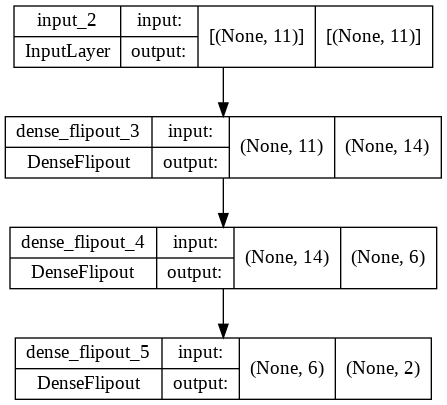

In [85]:
from keras.utils.vis_utils import plot_model
plot_model(new_model, to_file='model_plot1.png', show_shapes=True, show_layer_names=True)

#####v2

/usr/local/lib/python3.7/dist-packages/tensorflow_probability/python/layers/util.py:102: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  trainable=trainable)
/usr/local/lib/python3.7/dist-packages/tensorflow_probability/python/layers/util.py:112: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  trainable=trainable)


Epoch 1/80
219/219 [==============================] - 3s 3ms/step - loss: 0.7955 - accuracy: 0.5663
Epoch 2/80
219/219 [==============================] - 1s 3ms/step - loss: 0.7583 - accuracy: 0.5519
Epoch 3/80
219/219 [==============================] - 1s 3ms/step - loss: 0.7471 - accuracy: 0.4826
Epoch 4/80
219/219 [==============================] - 1s 3ms/step - loss: 0.7377 - accuracy: 0.5129
Epoch 5/80
219/219 [==============================] - 1s 3ms/step - loss: 0.7334 - accuracy: 0.5441
Epoch 6/80
219/219 [==============================] - 1s 3ms/step - loss: 0.7321 - accuracy: 0.5050
Epoch 7/80
219/219 [==============================] - 1s 3ms/step - loss: 0.7292 - accuracy: 0.4769
Epoch 8/80
219/219 [==============================] - 1s 3ms/step - loss: 0.7271 - accuracy: 0.4987
Epoch 9/80
219/219 [==============================] - 1s 3ms/step - loss: 0.7244 - accuracy: 0.5139
Epoch 10/80
219/219 [==============================] - 1s 3ms/step - loss: 0.7256 - accuracy: 0.5439

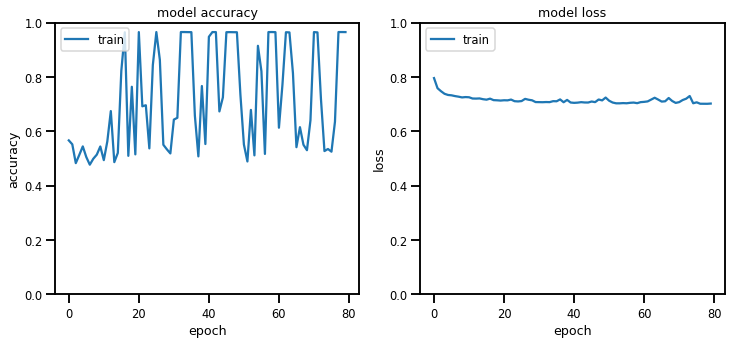

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_flipout_9 (DenseFlipo  (None, 14)               322       
 ut)                                                             
                                                                 
 dense_flipout_10 (DenseFlip  (None, 6)                174       
 out)                                                            
                                                                 
 dense_flipout_11 (DenseFlip  (None, 2)                26        
 out)                                                            
                                                                 
Total params: 522
Trainable params: 522
Non-trainable params: 0
_________________________________________________________________


In [87]:
dist = tfp.distributions 
dataset_size = len(X_train)
kl_divergence_function = (lambda q, p, _: dist.kl_divergence(q, p) / tf.cast(dataset_size, dtype=tf.float32))

model_tfp_v2 = tf.keras.Sequential([
    tf.keras.Input(X_train.shape[1]),
    tfp.layers.DenseFlipout(14, kernel_divergence_fn=kl_divergence_function, activation=tf.nn.relu),
    tfp.layers.DenseFlipout(6, kernel_divergence_fn=kl_divergence_function, activation=tf.nn.relu ),
    tfp.layers.DenseFlipout(2, kernel_divergence_fn=kl_divergence_function, activation=tf.nn.softmax),
])

learning_rate = 0.005
model_tfp_v2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),loss='binary_crossentropy',metrics=['accuracy'])

history = model_tfp_v2.fit(X_train, y_train, epochs=80)
test_loss, test_acc = model_tfp_v2.evaluate(X_test,  y_test)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

# TRY REMOVING THE VALIDATION PART FROM THE FIT
# validation_data = (np.asarray(X_test), np.asarray(y_test))
#history = normal_bnn_model.fit(np.asarray(X_train), np.asarray(y_train),epochs=50,validation_split=0.2, shuffle=True)
# to see history:
# list all data in history
print(history.history.keys())
# summarize history for accuracy

model_tfp_v2.save('model_tfp_v2.h5')
model_tfp_v2.save('saved_model/model_tfp_v2')
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim(0, 1)
# summarize history for loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim(0, 1)
plt.show()
plot_model(model_tfp_v2, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

model_tfp_v2.summary()

In [88]:
#ann_viz(model_tfp_v2, title="My Second neural network")

In [89]:
from keras.utils.vis_utils import plot_model
plot_model(model_tfp_v2, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

##### visualize BNN

In [90]:
!pip3 install keras
!pip3 install ann_visualizer
!pip install graphviz

Experiment 3: probabilistic Bayesian neural network: not needed


### DIFFERENT BNN'S
1. NORMAL BNN
2. BNN WITH DIFFERENT DROPOUTS
3. BNN WITH DIFFERENT EARLY STOPS
4. BNN WITH DIFFERENT REGULARIZERS
5. SIR mentioned to work on transformers also
6. MIXING OF THE ABOVE VARIANTS AND COMPARING WITH THE NORMAL ANN


PLOT THE UNCERTAINITIES FOR ALL THESE MODELS


#### 1. NORMAL BNN

In [91]:
dist = tfp.distributions 
dataset_size = len(X_train)
kl_divergence_function = (lambda q, p, _: dist.kl_divergence(q, p) / tf.cast(dataset_size, dtype=tf.float32))

normal_bnn_model = tf.keras.Sequential([
    tf.keras.Input(X_train.shape[1]),
    tfp.layers.DenseFlipout(16, kernel_divergence_fn=kl_divergence_function ),#activation=tf.nn.relu),
    tfp.layers.DenseFlipout(6, kernel_divergence_fn=kl_divergence_function,activation=tf.nn.relu),
    tfp.layers.DenseFlipout(3, kernel_divergence_fn=kl_divergence_function, activation=tf.nn.softmax),
])

learning_rate = 0.001
normal_bnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),loss='binary_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow_probability/python/layers/util.py:102: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  trainable=trainable)
/usr/local/lib/python3.7/dist-packages/tensorflow_probability/python/layers/util.py:112: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  trainable=trainable)


In [92]:
# TRY REMOVING THE VALIDATION PART FROM THE FIT
# validation_data = (np.asarray(X_test), np.asarray(y_test))
history = normal_bnn_model.fit(np.asarray(X_train), np.asarray(y_train),epochs=50,validation_split=0.2, shuffle=True)
# to see history:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
test_loss, test_acc = normal_bnn_model.evaluate(X_test,  y_test)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

normal_bnn_model.save('normal_bnn_model.h5')
normal_bnn_model.save('saved_model/normal_bnn_model')


Epoch 1/50
175/175 [==============================] - 3s 7ms/step - loss: 0.8485 - accuracy: 0.0720 - val_loss: 0.5491 - val_accuracy: 0.0136
Epoch 2/50
175/175 [==============================] - 1s 4ms/step - loss: 0.5352 - accuracy: 0.0082 - val_loss: 0.5369 - val_accuracy: 0.0050
Epoch 3/50
175/175 [==============================] - 1s 4ms/step - loss: 0.5295 - accuracy: 0.0045 - val_loss: 0.5322 - val_accuracy: 0.0021
Epoch 4/50
175/175 [==============================] - 1s 4ms/step - loss: 0.5265 - accuracy: 0.0021 - val_loss: 0.5283 - val_accuracy: 0.0014
Epoch 5/50
175/175 [==============================] - 1s 4ms/step - loss: 0.5229 - accuracy: 0.0020 - val_loss: 0.5257 - val_accuracy: 0.0021
Epoch 6/50
175/175 [==============================] - 1s 4ms/step - loss: 0.5203 - accuracy: 0.0493 - val_loss: 0.5233 - val_accuracy: 0.0429
Epoch 7/50
175/175 [==============================] - 1s 3ms/step - loss: 0.5181 - accuracy: 0.9146 - val_loss: 0.5205 - val_accuracy: 0.9564
Epoch 

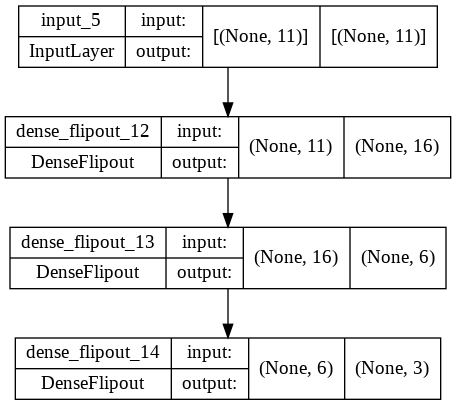

In [93]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim(0, 1)
# summarize history for loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim(0, 1)
plt.show()
plot_model(normal_bnn_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

#### NORMAL BNN2

In [94]:
dist = tfp.distributions 
dataset_size = len(X_train)
kl_divergence_function = (lambda q, p, _: dist.kl_divergence(q, p) / tf.cast(dataset_size, dtype=tf.float32))

normal_bnn2_model = tf.keras.Sequential([
    tf.keras.Input(X_train.shape[1]),
    #Dense(units = 22, activation = 'relu'),
    tfp.layers.DenseFlipout(22, kernel_divergence_fn=kl_divergence_function),#activation=tf.nn.relu),
    tfp.layers.DenseFlipout(12, kernel_divergence_fn=kl_divergence_function),#activation=tf.nn.relu),
    tfp.layers.DenseFlipout(4, kernel_divergence_fn=kl_divergence_function, activation=tf.nn.relu),
    tfp.layers.DenseFlipout(2, kernel_divergence_fn=kl_divergence_function, activation=tf.nn.softmax),
])

learning_rate = 0.00065
normal_bnn2_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),loss='binary_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow_probability/python/layers/util.py:102: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  trainable=trainable)
/usr/local/lib/python3.7/dist-packages/tensorflow_probability/python/layers/util.py:112: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  trainable=trainable)


In [95]:
# TRY REMOVING THE VALIDATION PART FROM THE FIT
# validation_data = (np.asarray(X_test), np.asarray(y_test))
history = normal_bnn2_model.fit(np.asarray(X_train), np.asarray(y_train),epochs=100)#,validation_split=0.2, shuffle=True)
# to see history:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
test_loss, test_acc = normal_bnn_model.evaluate(X_test,  y_test)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)



Epoch 1/100
219/219 [==============================] - 4s 4ms/step - loss: 1.0113 - accuracy: 0.1489
Epoch 2/100
219/219 [==============================] - 1s 4ms/step - loss: 0.8941 - accuracy: 0.0466
Epoch 3/100
219/219 [==============================] - 1s 4ms/step - loss: 0.8894 - accuracy: 0.0410
Epoch 4/100
219/219 [==============================] - 1s 4ms/step - loss: 0.8851 - accuracy: 0.0590
Epoch 5/100
219/219 [==============================] - 1s 3ms/step - loss: 0.8821 - accuracy: 0.0371
Epoch 6/100
219/219 [==============================] - 1s 3ms/step - loss: 0.8772 - accuracy: 0.4076
Epoch 7/100
219/219 [==============================] - 1s 3ms/step - loss: 0.8730 - accuracy: 0.5207
Epoch 8/100
219/219 [==============================] - 1s 3ms/step - loss: 0.8688 - accuracy: 0.3263
Epoch 9/100
219/219 [==============================] - 1s 3ms/step - loss: 0.8644 - accuracy: 0.5873
Epoch 10/100
219/219 [==============================] - 1s 3ms/step - loss: 0.8599 - accura

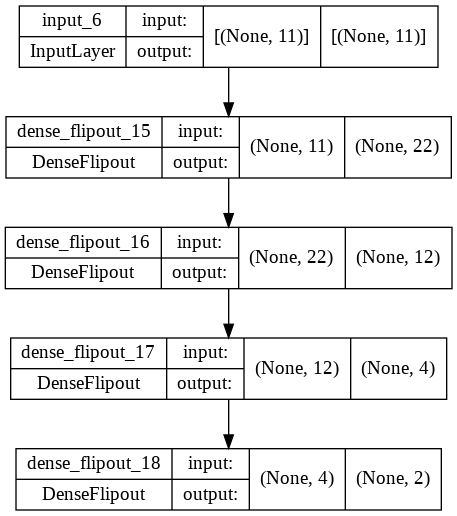

In [96]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim(0, 1)
# summarize history for loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim(0, 1)
plt.show()
plot_model(normal_bnn2_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [97]:
normal_bnn2_model.save('normal_bnn2_model.h5')
normal_bnn2_model.save('saved_model/normal_bnn2_model')

INFO:tensorflow:Assets written to: saved_model/normal_bnn2_model/assets


#### 2. BNN WITH DIFFERENT DROPOUT VALUES
MC Dropout write description here!

In [98]:
dist = tfp.distributions 
dataset_size = len(X_train)
kl_divergence_function = (lambda q, p, _: dist.kl_divergence(q, p) / tf.cast(dataset_size, dtype=tf.float32))

model_dropout_v1 = tf.keras.Sequential([
    tf.keras.Input(X_train.shape[1]),
    tfp.layers.DenseFlipout(14, kernel_divergence_fn=kl_divergence_function, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tfp.layers.DenseFlipout(6, kernel_divergence_fn=kl_divergence_function, activation=tf.nn.relu ),
    tfp.layers.DenseFlipout(2, kernel_divergence_fn=kl_divergence_function, activation=tf.nn.softmax),
])

learning_rate = 0.005
model_dropout_v1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),loss='binary_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow_probability/python/layers/util.py:102: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  trainable=trainable)
/usr/local/lib/python3.7/dist-packages/tensorflow_probability/python/layers/util.py:112: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  trainable=trainable)


In [99]:
dist = tfp.distributions 
dataset_size = len(X_train)
kl_divergence_function = (lambda q, p, _: dist.kl_divergence(q, p) / tf.cast(dataset_size, dtype=tf.float32))

model_dropout_v2 = tf.keras.Sequential([
    tf.keras.Input(X_train.shape[1]),
    tfp.layers.DenseFlipout(14, kernel_divergence_fn=kl_divergence_function, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.35),
    tfp.layers.DenseFlipout(6, kernel_divergence_fn=kl_divergence_function, activation=tf.nn.relu ),
    tfp.layers.DenseFlipout(2, kernel_divergence_fn=kl_divergence_function, activation=tf.nn.softmax),
])

learning_rate = 0.005
model_dropout_v2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),loss='binary_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow_probability/python/layers/util.py:102: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  trainable=trainable)
/usr/local/lib/python3.7/dist-packages/tensorflow_probability/python/layers/util.py:112: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  trainable=trainable)


In [100]:
dist = tfp.distributions 
dataset_size = len(X_train)
kl_divergence_function = (lambda q, p, _: dist.kl_divergence(q, p) / tf.cast(dataset_size, dtype=tf.float32))

model_dropout_v3 = tf.keras.Sequential([
    tf.keras.Input(X_train.shape[1]),
    tfp.layers.DenseFlipout(14, kernel_divergence_fn=kl_divergence_function, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.5),
    tfp.layers.DenseFlipout(6, kernel_divergence_fn=kl_divergence_function, activation=tf.nn.relu ),
    tfp.layers.DenseFlipout(2, kernel_divergence_fn=kl_divergence_function, activation=tf.nn.softmax),
])

learning_rate = 0.005
model_dropout_v3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),loss='binary_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow_probability/python/layers/util.py:102: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  trainable=trainable)
/usr/local/lib/python3.7/dist-packages/tensorflow_probability/python/layers/util.py:112: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  trainable=trainable)


Epoch 1/40
219/219 [==============================] - 1s 4ms/step - loss: 0.4437 - accuracy: 0.5416
Epoch 2/40
219/219 [==============================] - 1s 4ms/step - loss: 0.4414 - accuracy: 0.4229
Epoch 3/40
219/219 [==============================] - 1s 4ms/step - loss: 0.4414 - accuracy: 0.9109
Epoch 4/40
219/219 [==============================] - 1s 4ms/step - loss: 0.4407 - accuracy: 0.9563
Epoch 5/40
219/219 [==============================] - 1s 4ms/step - loss: 0.4407 - accuracy: 0.9427
Epoch 6/40
219/219 [==============================] - 1s 4ms/step - loss: 0.4411 - accuracy: 0.9351
Epoch 7/40
219/219 [==============================] - 1s 4ms/step - loss: 0.4401 - accuracy: 0.4393
Epoch 8/40
219/219 [==============================] - 1s 4ms/step - loss: 0.4414 - accuracy: 0.8557
Epoch 9/40
219/219 [==============================] - 1s 4ms/step - loss: 0.4407 - accuracy: 0.9559
Epoch 10/40
219/219 [==============================] - 1s 4ms/step - loss: 0.4400 - accuracy: 0.9341

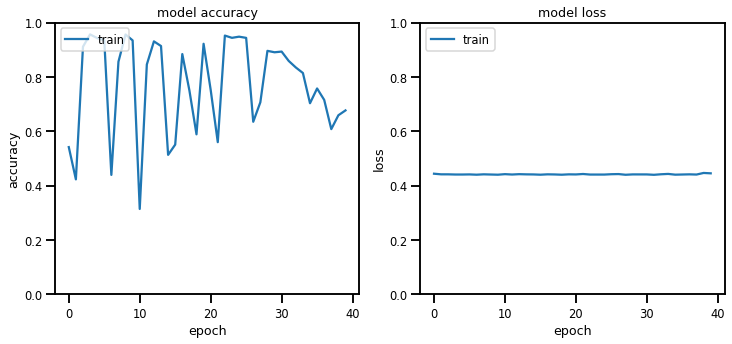

Epoch 1/40
219/219 [==============================] - 1s 4ms/step - loss: 0.7227 - accuracy: 0.5099
Epoch 2/40
219/219 [==============================] - 1s 4ms/step - loss: 0.7189 - accuracy: 0.4459
Epoch 3/40
219/219 [==============================] - 1s 5ms/step - loss: 0.7222 - accuracy: 0.6073
Epoch 4/40
219/219 [==============================] - 1s 4ms/step - loss: 0.7202 - accuracy: 0.9646
Epoch 5/40
219/219 [==============================] - 1s 4ms/step - loss: 0.7212 - accuracy: 0.9644
Epoch 6/40
219/219 [==============================] - 1s 4ms/step - loss: 0.7201 - accuracy: 0.9647
Epoch 7/40
219/219 [==============================] - 1s 4ms/step - loss: 0.7225 - accuracy: 0.8770
Epoch 8/40
219/219 [==============================] - 1s 4ms/step - loss: 0.7190 - accuracy: 0.5717
Epoch 9/40
219/219 [==============================] - 1s 4ms/step - loss: 0.7269 - accuracy: 0.9643
Epoch 10/40
219/219 [==============================] - 1s 4ms/step - loss: 0.7199 - accuracy: 0.9647

Epoch 1/40
219/219 [==============================] - 1s 3ms/step - loss: 0.7149 - accuracy: 0.5773
Epoch 2/40
219/219 [==============================] - 1s 4ms/step - loss: 0.7154 - accuracy: 0.4966
Epoch 3/40
219/219 [==============================] - 1s 3ms/step - loss: 0.7168 - accuracy: 0.4941
Epoch 4/40
219/219 [==============================] - 1s 3ms/step - loss: 0.7134 - accuracy: 0.5037
Epoch 5/40
219/219 [==============================] - 1s 3ms/step - loss: 0.7154 - accuracy: 0.5253
Epoch 6/40
219/219 [==============================] - 1s 3ms/step - loss: 0.7105 - accuracy: 0.6251
Epoch 7/40
219/219 [==============================] - 1s 3ms/step - loss: 0.7233 - accuracy: 0.5404
Epoch 8/40
219/219 [==============================] - 1s 3ms/step - loss: 0.7208 - accuracy: 0.6339
Epoch 9/40
219/219 [==============================] - 1s 3ms/step - loss: 0.7160 - accuracy: 0.5061
Epoch 10/40
219/219 [==============================] - 1s 3ms/step - loss: 0.7188 - accuracy: 0.5030

Epoch 1/40
219/219 [==============================] - 1s 4ms/step - loss: 0.7085 - accuracy: 0.4849
Epoch 2/40
219/219 [==============================] - 1s 4ms/step - loss: 0.7107 - accuracy: 0.4779
Epoch 3/40
219/219 [==============================] - 1s 4ms/step - loss: 0.7101 - accuracy: 0.5181
Epoch 4/40
219/219 [==============================] - 1s 4ms/step - loss: 0.7071 - accuracy: 0.5574
Epoch 5/40
219/219 [==============================] - 1s 3ms/step - loss: 0.7080 - accuracy: 0.5976
Epoch 6/40
219/219 [==============================] - 1s 3ms/step - loss: 0.7065 - accuracy: 0.5294
Epoch 7/40
219/219 [==============================] - 1s 4ms/step - loss: 0.7121 - accuracy: 0.6101
Epoch 8/40
219/219 [==============================] - 1s 3ms/step - loss: 0.7080 - accuracy: 0.5214
Epoch 9/40
219/219 [==============================] - 1s 4ms/step - loss: 0.7106 - accuracy: 0.4824
Epoch 10/40
219/219 [==============================] - 1s 3ms/step - loss: 0.7063 - accuracy: 0.5196

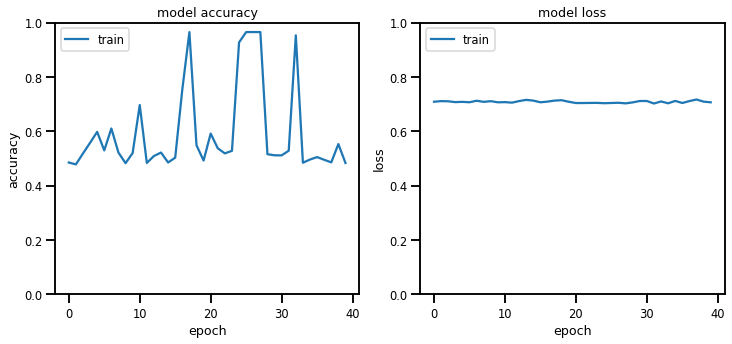

Epoch 1/40
219/219 [==============================] - 1s 4ms/step - loss: 0.7029 - accuracy: 0.5803
Epoch 2/40
219/219 [==============================] - 1s 4ms/step - loss: 0.7063 - accuracy: 0.5121
Epoch 3/40
219/219 [==============================] - 1s 3ms/step - loss: 0.7085 - accuracy: 0.5177
Epoch 4/40
219/219 [==============================] - 1s 4ms/step - loss: 0.7035 - accuracy: 0.4850
Epoch 5/40
219/219 [==============================] - 1s 4ms/step - loss: 0.7026 - accuracy: 0.5550
Epoch 6/40
219/219 [==============================] - 1s 4ms/step - loss: 0.7049 - accuracy: 0.4936
Epoch 7/40
219/219 [==============================] - 1s 4ms/step - loss: 0.7022 - accuracy: 0.8043
Epoch 8/40
219/219 [==============================] - 1s 4ms/step - loss: 0.7020 - accuracy: 0.9649
Epoch 9/40
219/219 [==============================] - 1s 4ms/step - loss: 0.7028 - accuracy: 0.9650
Epoch 10/40
219/219 [==============================] - 1s 4ms/step - loss: 0.7026 - accuracy: 0.9647

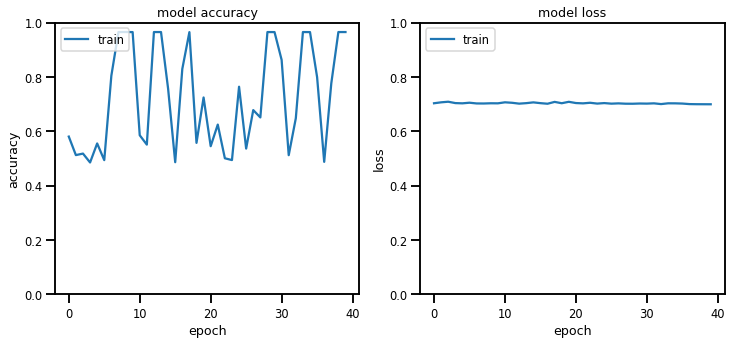

In [114]:
from sklearn.metrics import classification_report

models = [normal_bnn_model,normal_bnn2_model,model_dropout_v1, model_dropout_v2, model_dropout_v3]

models_acc = []
models_loss = []
i = 1
for p_model in models:
    history = p_model.fit(X_train, y_train, epochs=40)#,batch_size=1,validation_data = (np.asarray(X_test), np.asarray(y_test)),verbose=0)
    #history = normal_bnn_model.fit(np.asarray(X_train), np.asarray(y_train),epochs=100, batch_size=1,validation_data = (np.asarray(X_test), np.asarray(y_test)),verbose=0)
    test_loss, test_acc = p_model.evaluate(X_test, y_test)
    y_pred = p_model.predict(X_test)
    print('\nTest accuracy:', test_acc)
    print('\nTest loss:', test_loss)
    models_acc.append(test_acc)
    models_loss.append(test_loss)
    #history = normal_bnn_model.fit(np.asarray(X_train), np.asarray(y_train),epochs=100, batch_size=1,verbose=0)
    # to see history:
    # list all data in history
    print(history.history.keys())
    p_model.save('%s.h5' %('p_model'+' '+str(i)))
    p_model.save('saved_model/%s' %('p_model'+' '+str(i)))
    i = i+1
    # summarize history for accuracy
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'])
    #plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.ylim(0, 1)
    # summarize history for loss
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    #plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.ylim(0, 1)
    plt.show()
    plot_model(p_model, to_file='model_plotss.png', show_shapes=True, show_layer_names=True)
    '''index = 0
    for i in y_pred:
        if i<0.5:
            y_pred[index] = 0
        else:
            y_pred[index] = 1

    print(classification_report(y_test, y_pred))'''

In [115]:
print(models_acc)
print(models_loss)

[0.968666672706604, 0.9693333506584167, 0.968999981880188, 0.03133333474397659, 0.968666672706604]
[0.43769827485084534, 0.7226769924163818, 0.7028810977935791, 0.703898012638092, 0.7059929370880127]


#### 3. BNN WITH DIFFERENT EARLY STOPS


In [116]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

#callbacks=[callback]
dist = tfp.distributions 
dataset_size = len(X_train)
kl_divergence_function = (lambda q, p, _: dist.kl_divergence(q, p) / tf.cast(dataset_size, dtype=tf.float32))

model_callback_v1 = tf.keras.Sequential([
    tf.keras.Input(X_train.shape[1]),
    tfp.layers.DenseFlipout(14, kernel_divergence_fn=kl_divergence_function, activation=tf.nn.relu),
    #tf.keras.layers.Dropout(0.5)
    tfp.layers.DenseFlipout(6, kernel_divergence_fn=kl_divergence_function, activation=tf.nn.relu ),
    tfp.layers.DenseFlipout(2, kernel_divergence_fn=kl_divergence_function, activation=tf.nn.softmax),
])

learning_rate = 0.005
model_callback_v1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),loss='binary_crossentropy',metrics=['accuracy'])
history = model_callback_v1.fit(np.asarray(X_train), np.asarray(y_train),epochs=80, batch_size=1, callbacks=[callback],verbose=0)
len(history.history['loss'])

#model_tfp_v2.fit(X_train, y_train, epochs=80)
test_loss, test_acc = model_callback_v1.evaluate(X_test,  y_test)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

model_callback_v1.summary()

/usr/local/lib/python3.7/dist-packages/tensorflow_probability/python/layers/util.py:102: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  trainable=trainable)
/usr/local/lib/python3.7/dist-packages/tensorflow_probability/python/layers/util.py:112: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  trainable=trainable)


94/94 [==============================] - 1s 2ms/step - loss: 0.8611 - accuracy: 0.9593

Test accuracy: 0.9593333601951599

Test loss: 0.861093282699585
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_flipout_37 (DenseFlip  (None, 14)               322       
 out)                                                            
                                                                 
 dense_flipout_38 (DenseFlip  (None, 6)                174       
 out)                                                            
                                                                 
 dense_flipout_39 (DenseFlip  (None, 2)                26        
 out)                                                            
                                                                 
Total params: 522
Trainable params: 522
Non-trainable params: 0
___________________________________

In [117]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=4)

#callbacks=[callback]
dist = tfp.distributions 
dataset_size = len(X_train)
kl_divergence_function = (lambda q, p, _: dist.kl_divergence(q, p) / tf.cast(dataset_size, dtype=tf.float32))

model_callback_v2 = tf.keras.Sequential([
    tf.keras.Input(X_train.shape[1]),
    tfp.layers.DenseFlipout(14, kernel_divergence_fn=kl_divergence_function, activation=tf.nn.relu),
    #tf.keras.layers.Dropout(0.5)
    tfp.layers.DenseFlipout(6, kernel_divergence_fn=kl_divergence_function, activation=tf.nn.relu ),
    tfp.layers.DenseFlipout(2, kernel_divergence_fn=kl_divergence_function, activation=tf.nn.softmax),
])

learning_rate = 0.005
model_callback_v2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),loss='binary_crossentropy',metrics=['accuracy'])
history = model_callback_v2.fit(np.asarray(X_train), np.asarray(y_train),epochs=10, batch_size=1, callbacks=[callback],verbose=0)
len(history.history['loss'])

test_loss, test_acc = model_callback_v2.evaluate(X_test,  y_test)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)
model_callback_v2.summary()

/usr/local/lib/python3.7/dist-packages/tensorflow_probability/python/layers/util.py:102: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  trainable=trainable)
/usr/local/lib/python3.7/dist-packages/tensorflow_probability/python/layers/util.py:112: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  trainable=trainable)


94/94 [==============================] - 1s 2ms/step - loss: 0.7917 - accuracy: 0.9607

Test accuracy: 0.9606666564941406

Test loss: 0.7917195558547974
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_flipout_40 (DenseFlip  (None, 14)               322       
 out)                                                            
                                                                 
 dense_flipout_41 (DenseFlip  (None, 6)                174       
 out)                                                            
                                                                 
 dense_flipout_42 (DenseFlip  (None, 2)                26        
 out)                                                            
                                                                 
Total params: 522
Trainable params: 522
Non-trainable params: 0
__________________________________

In [118]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)

#callbacks=[callback]
dist = tfp.distributions 
dataset_size = len(X_train)
kl_divergence_function = (lambda q, p, _: dist.kl_divergence(q, p) / tf.cast(dataset_size, dtype=tf.float32))

model_callback_v3 = tf.keras.Sequential([
    tf.keras.Input(X_train.shape[1]),
    tfp.layers.DenseFlipout(14, kernel_divergence_fn=kl_divergence_function, activation=tf.nn.relu),
    #tf.keras.layers.Dropout(0.5)
    tfp.layers.DenseFlipout(6, kernel_divergence_fn=kl_divergence_function, activation=tf.nn.relu ),
    tfp.layers.DenseFlipout(2, kernel_divergence_fn=kl_divergence_function, activation=tf.nn.softmax),
])

learning_rate = 0.005
model_callback_v3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),loss='binary_crossentropy',metrics=['accuracy'])
history = model_callback_v3.fit(np.asarray(X_train), np.asarray(y_train),epochs=10, batch_size=1, callbacks=[callback],verbose=0)
len(history.history['loss'])

test_loss, test_acc = model_callback_v3.evaluate(X_test,  y_test)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)
model_callback_v3.summary()

/usr/local/lib/python3.7/dist-packages/tensorflow_probability/python/layers/util.py:102: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  trainable=trainable)
/usr/local/lib/python3.7/dist-packages/tensorflow_probability/python/layers/util.py:112: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  trainable=trainable)


94/94 [==============================] - 1s 2ms/step - loss: 0.9403 - accuracy: 0.9460

Test accuracy: 0.9459999799728394

Test loss: 0.9402525424957275
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_flipout_43 (DenseFlip  (None, 14)               322       
 out)                                                            
                                                                 
 dense_flipout_44 (DenseFlip  (None, 6)                174       
 out)                                                            
                                                                 
 dense_flipout_45 (DenseFlip  (None, 2)                26        
 out)                                                            
                                                                 
Total params: 522
Trainable params: 522
Non-trainable params: 0
__________________________________

Epoch 1/40
219/219 [==============================] - 1s 4ms/step - loss: 0.4434 - accuracy: 0.4884
Epoch 2/40
219/219 [==============================] - 1s 4ms/step - loss: 0.4416 - accuracy: 0.6369
Epoch 3/40
219/219 [==============================] - 1s 4ms/step - loss: 0.4449 - accuracy: 0.6207
Epoch 4/40
219/219 [==============================] - 1s 4ms/step - loss: 0.4409 - accuracy: 0.3781
Epoch 5/40
219/219 [==============================] - 1s 4ms/step - loss: 0.4455 - accuracy: 0.5490
Epoch 6/40
219/219 [==============================] - 1s 4ms/step - loss: 0.4451 - accuracy: 0.6577
Epoch 7/40
219/219 [==============================] - 1s 4ms/step - loss: 0.4430 - accuracy: 0.3147
Epoch 8/40
219/219 [==============================] - 1s 4ms/step - loss: 0.4436 - accuracy: 0.9260
Epoch 9/40
219/219 [==============================] - 1s 4ms/step - loss: 0.4436 - accuracy: 0.9197
Epoch 10/40
219/219 [==============================] - 1s 4ms/step - loss: 0.4429 - accuracy: 0.4706

Epoch 1/40
219/219 [==============================] - 1s 5ms/step - loss: 0.7195 - accuracy: 0.6791
Epoch 2/40
219/219 [==============================] - 1s 5ms/step - loss: 0.7206 - accuracy: 0.7540
Epoch 3/40
219/219 [==============================] - 1s 5ms/step - loss: 0.7216 - accuracy: 0.9643
Epoch 4/40
219/219 [==============================] - 1s 5ms/step - loss: 0.7229 - accuracy: 0.7107
Epoch 5/40
219/219 [==============================] - 1s 5ms/step - loss: 0.7175 - accuracy: 0.7173
Epoch 6/40
219/219 [==============================] - 1s 4ms/step - loss: 0.7175 - accuracy: 0.9647
Epoch 7/40
219/219 [==============================] - 1s 5ms/step - loss: 0.7184 - accuracy: 0.9647
Epoch 8/40
219/219 [==============================] - 1s 5ms/step - loss: 0.7193 - accuracy: 0.9644
Epoch 9/40
219/219 [==============================] - 1s 5ms/step - loss: 0.7202 - accuracy: 0.9643
Epoch 10/40
219/219 [==============================] - 1s 5ms/step - loss: 0.7181 - accuracy: 0.9646

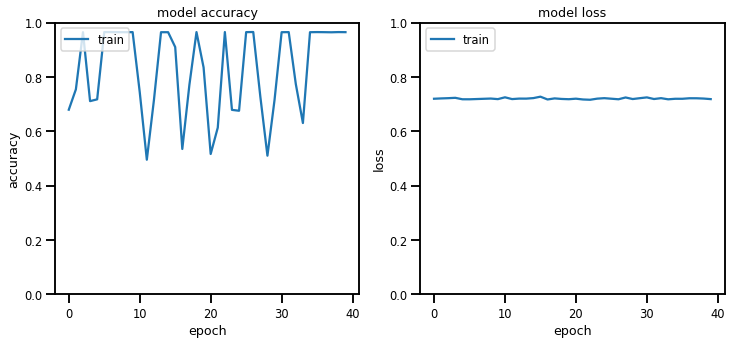

Epoch 1/40
219/219 [==============================] - 2s 4ms/step - loss: 0.8826 - accuracy: 0.5593
Epoch 2/40
219/219 [==============================] - 1s 4ms/step - loss: 0.7445 - accuracy: 0.4886
Epoch 3/40
219/219 [==============================] - 1s 4ms/step - loss: 0.7337 - accuracy: 0.4974
Epoch 4/40
219/219 [==============================] - 1s 4ms/step - loss: 0.7109 - accuracy: 0.9599
Epoch 5/40
219/219 [==============================] - 1s 4ms/step - loss: 0.7218 - accuracy: 0.9644
Epoch 6/40
219/219 [==============================] - 1s 4ms/step - loss: 0.7217 - accuracy: 0.9647
Epoch 7/40
219/219 [==============================] - 1s 4ms/step - loss: 0.7187 - accuracy: 0.7347
Epoch 8/40
219/219 [==============================] - 1s 4ms/step - loss: 0.7227 - accuracy: 0.7401
Epoch 9/40
219/219 [==============================] - 1s 4ms/step - loss: 0.7206 - accuracy: 0.9639
Epoch 10/40
219/219 [==============================] - 1s 4ms/step - loss: 0.7117 - accuracy: 0.9647

Epoch 1/40
219/219 [==============================] - 2s 4ms/step - loss: 0.7760 - accuracy: 0.5219
Epoch 2/40
219/219 [==============================] - 1s 4ms/step - loss: 0.7468 - accuracy: 0.4893
Epoch 3/40
219/219 [==============================] - 1s 4ms/step - loss: 0.7383 - accuracy: 0.7376
Epoch 4/40
219/219 [==============================] - 1s 4ms/step - loss: 0.7180 - accuracy: 0.5283
Epoch 5/40
219/219 [==============================] - 1s 4ms/step - loss: 0.7184 - accuracy: 0.5636
Epoch 6/40
219/219 [==============================] - 1s 4ms/step - loss: 0.7193 - accuracy: 0.9640
Epoch 7/40
219/219 [==============================] - 1s 4ms/step - loss: 0.7300 - accuracy: 0.7379
Epoch 8/40
219/219 [==============================] - 1s 4ms/step - loss: 0.7066 - accuracy: 0.4960
Epoch 9/40
219/219 [==============================] - 1s 4ms/step - loss: 0.7238 - accuracy: 0.6319
Epoch 10/40
219/219 [==============================] - 1s 4ms/step - loss: 0.7125 - accuracy: 0.7720

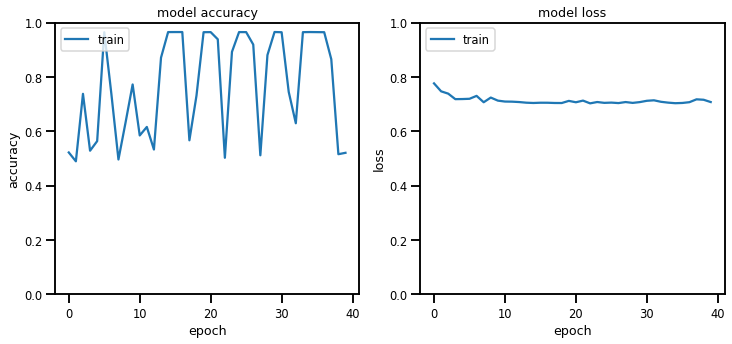

Epoch 1/40
219/219 [==============================] - 2s 4ms/step - loss: 0.7626 - accuracy: 0.5341
Epoch 2/40
219/219 [==============================] - 1s 4ms/step - loss: 0.7341 - accuracy: 0.5100
Epoch 3/40
219/219 [==============================] - 1s 4ms/step - loss: 0.7411 - accuracy: 0.5236
Epoch 4/40
219/219 [==============================] - 1s 4ms/step - loss: 0.7150 - accuracy: 0.5039
Epoch 5/40
219/219 [==============================] - 1s 5ms/step - loss: 0.7271 - accuracy: 0.6199
Epoch 6/40
219/219 [==============================] - 1s 4ms/step - loss: 0.7132 - accuracy: 0.5349
Epoch 7/40
219/219 [==============================] - 1s 4ms/step - loss: 0.7154 - accuracy: 0.4819
Epoch 8/40
219/219 [==============================] - 1s 5ms/step - loss: 0.7064 - accuracy: 0.4943
Epoch 9/40
219/219 [==============================] - 1s 5ms/step - loss: 0.7084 - accuracy: 0.8410
Epoch 10/40
219/219 [==============================] - 1s 5ms/step - loss: 0.7073 - accuracy: 0.9644

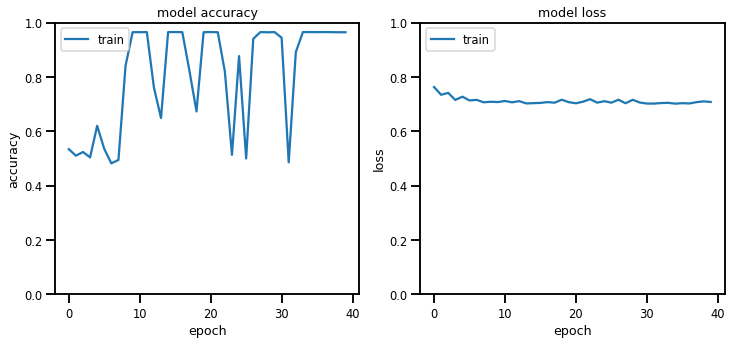

In [119]:
from sklearn.metrics import classification_report

models = [normal_bnn_model,normal_bnn2_model,model_callback_v1, model_callback_v2, model_callback_v3]

models_acc = []
models_loss = []
i = 6
for p_model in models:
    history = p_model.fit(X_train, y_train, epochs=40)#,batch_size=1,validation_data = (np.asarray(X_test), np.asarray(y_test)),verbose=0)
    #history = normal_bnn_model.fit(np.asarray(X_train), np.asarray(y_train),epochs=100, batch_size=1,validation_data = (np.asarray(X_test), np.asarray(y_test)),verbose=0)
    test_loss, test_acc = p_model.evaluate(X_test, y_test)
    y_pred = p_model.predict(X_test)
    print('\nTest accuracy:', test_acc)
    print('\nTest loss:', test_loss)
    models_acc.append(test_acc)
    models_loss.append(test_loss)
    #history = normal_bnn_model.fit(np.asarray(X_train), np.asarray(y_train),epochs=100, batch_size=1,verbose=0)
    # to see history:
    # list all data in history
    print(history.history.keys())
    p_model.save('%s.h5' %('callp_model'+' '+str(i)))
    p_model.save('saved_model/%s' %('callp_model'+' '+str(i)))
    i = i+1
    # summarize history for accuracy
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'])
    #plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.ylim(0, 1)
    # summarize history for loss
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    #plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.ylim(0, 1)
    plt.show()
    plot_model(p_model, to_file='model_plotsss.png', show_shapes=True, show_layer_names=True)
    '''index = 0
    for i in y_pred:
        if i<0.5:
            y_pred[index] = 0
        else:
            y_pred[index] = 1

    print(classification_report(y_test, y_pred))'''

#### 4. BNN WITH DIFFERENT REGULARIZERS


TRANSFORMERS

#### 6. MIXING OF THE ABOVE VARIANTS AND COMPARING WITH THE NORMAL ANN


#### w and b site
streamlit for gui

### WEEKLY OUTPUT PDFS

#### convert notebook to pdf 
for weekly progrss submission


In [120]:
%cd /content/drive/MyDrive/Colab Notebooks/MTP
!pwd
!ls

/content/drive/MyDrive/Colab Notebooks/MTP
/content/drive/MyDrive/Colab Notebooks/MTP
 3rd_sem1.pdf			      material
 3rd_sem.pdf			      model_tfp1v1.pkl
 4th_sem_MARCH.pdf		      model_tfp_v1.h5
 4th_sem_mid_FINAL.pdf		      MTP_BNN.ipynb
 4th_sem_mid.pdf		      MTP_BNN.pdf
 4th_sem_mid_plots.pdf		      MTP_Data_Visualization.ipynb
 4th_sem_mid_plots_sir.pdf	      READ.md
 4th_sem.pdf			      README.md
'Copy of 4th_sem_mid.pdf'	      saved_model
'Copy of 4th_sem_mid_plots.pdf'       w1.pdf
'Copy of 4th_sem_mid_plots_sir.pdf'   w2.pdf
 datasets			     'web app'
 dec.pdf


In [ ]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-generic-recommended

In [ ]:
!jupyter nbconvert --to pdf --output "4th_sem_mid_FINAL_allss" MTP_BNN.ipynb

In [122]:
# should have saved plots as files for download


In [ ]:
from google.colab import files
!zip -r /content/models.zip /content/saved_model
files.download("/content/models.zip")
!zip -r /content/content.zip /content/*.h5
files.download("/content/contenth5.zip")
!zip -r /content/content.zip /content/*.png
files.download("/content/contentpng.zip")
